In [13]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd



num_good_traj = 0
my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_201'
exps = glob(my_dir+'*')
fig = plt.figure(clear=True, figsize=(11,11))

d = exps[0]

df = load_results(d)
df2 = pd.DataFrame() 

df['f']= df['l'].cumsum()/1000000


df['perf']= df['ereward']/(df['max_reward'])
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold

df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])

time_limit = 0
df3 = df.where((df['f']>time_limit)&(df['max_value_error'] == 0)).sort_values(by=['value'], ascending=False)

# for ii in range(50):
#     max_index = ii
#     X = eval(df3['X'].iloc[max_index])[0:-1]
#     Y = eval(df3['Y'].iloc[max_index])[0:-1]
#     Z = eval(df3['Z'].iloc[max_index])[0:-1]
#     fig = plt.figure(clear=True, figsize=(11,11))
#     plt.plot(X, Z)
#     plt.plot(X, Y)
#     plt.plot(X[-1],Z[-1],"*",markersize=15)


#     rectangle = plt.Rectangle((10 - 2,30- 2), 4, 4, fc='blue')
#     plt.gca().add_patch(rectangle)
#     rectangle = plt.Rectangle((30 -2,10- 2), 4, 4, fc='blue')
#     plt.gca().add_patch(rectangle)
#     rectangle = plt.Rectangle((30 -2,30- 2), 4, 4, fc='blue')
#     plt.gca().add_patch(rectangle)
#     rectangle = plt.Rectangle((10 -2,10- 2), 4, 4, fc='blue')
#     plt.gca().add_patch(rectangle)
#     rectangle = plt.Rectangle((28 -4,20- 4), 8, 8, fc='pink')
#     plt.gca().add_patch(rectangle)
#     rectangle = plt.Rectangle((7.5 -2,20- 2), 4, 4, fc='black')
#     plt.gca().add_patch(rectangle)
#     rectangle = plt.Rectangle((22 -2,20 -2), 4, 4, fc='black')
#     plt.gca().add_patch(rectangle)
   

#     plt.xlim(0,40)
#     plt.ylim(0,40)
#     plt.title('VALUE:{} REWARD:{} TIME:{} Index:{}'.format(df3['value'].iloc[max_index], df3['reward_woD'].iloc[max_index],df3['f'].iloc[max_index], ii))
#     plt.show()

<Figure size 792x792 with 0 Axes>

In [110]:

from matplotlib.gridspec import GridSpec

def plot_trajectory(df3, target_f, box_pos):

    X = eval(df3['X'][df3['value'] == target_f].item())[0:-1]
    Y = eval(df3['Y'][df3['value'] == target_f].item())[0:-1]
    Z = eval(df3['Z'][df3['value'] == target_f].item())[0:-1]


    fig = plt.figure(clear=True, figsize=(12,14))
    gs=GridSpec(6,7) # 2 rows, 3 columns


    ax1=fig.add_subplot(gs[0:5,:]) # First row, third column
    ax2=fig.add_subplot(gs[5:,:]) # Second row, span all columns

    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax1.plot(X, Z)
    ax2.plot(X, Y, 'r')

    X_ = box_pos[0][0]
    Y_ = box_pos[0][1]
    rectangle = plt.Rectangle((X_-2,Y_- 2), 4, 4, fc='blue')
    ax1.add_patch(rectangle)

    X_ = box_pos[1][0]
    Y_ = box_pos[1][1]
    rectangle = plt.Rectangle((X_ -2,Y_- 2), 4, 4, fc='blue')
    ax1.add_patch(rectangle)
    rectangle = plt.Rectangle((28 -4,20- 4), 8, 8, fc='pink')
    ax1.add_patch(rectangle)
    rectangle = plt.Rectangle((7.5 -2,20- 2), 4, 4, fc='black')
    ax1.add_patch(rectangle)
    rectangle = plt.Rectangle((22 -2,20 -2), 4, 4, fc='black')
    ax1.add_patch(rectangle)
    ball = plt.Circle((7.5 ,20), 1.3, color='g', clip_on=False)
    ax1.add_patch(ball)


    ax1.set_xlim(0, 40)
    ax1.set_ylim(0, 40)
    plt.title('VALUE:{} TIME:{}'.format(df3['value'][df3['value'] == target_f].item(), df3['f'][df3['value'] == target_f].item()), fontsize=22, y=-0.6)
    ax1.spines["bottom"].set_linewidth(3)
    ax1.spines["top"].set_linewidth(3)
    ax1.spines["right"].set_linewidth(3)
    ax1.spines["left"].set_linewidth(3)

    ax2.spines["bottom"].set_linewidth(3)
    ax2.spines["top"].set_linewidth(3)
    ax2.spines["right"].set_linewidth(3)
    ax2.spines["left"].set_linewidth(3)

    ax2.set_xlim(0, 40)
    ax2.set_ylim(0, 3.5)





/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: `item` has been deprecated and will be removed in a future version


10 10
<class 'int'>
<class 'int'>


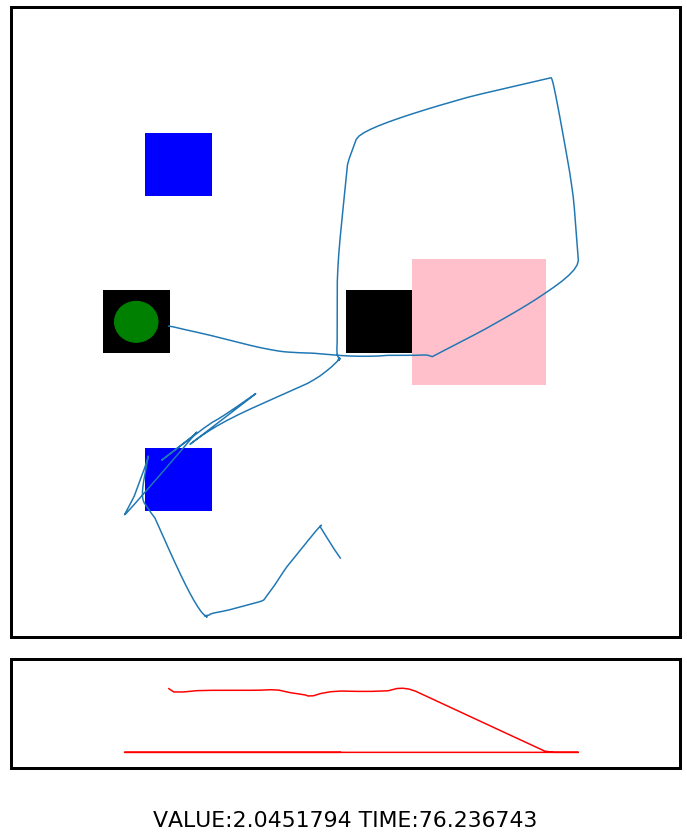

In [109]:
target_f = 2.0451794
box_pos = [[10,10],[10,30]]
plot_trajectory(df3, target_f, box_pos)

/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: `item` has been deprecated and will be removed in a future version


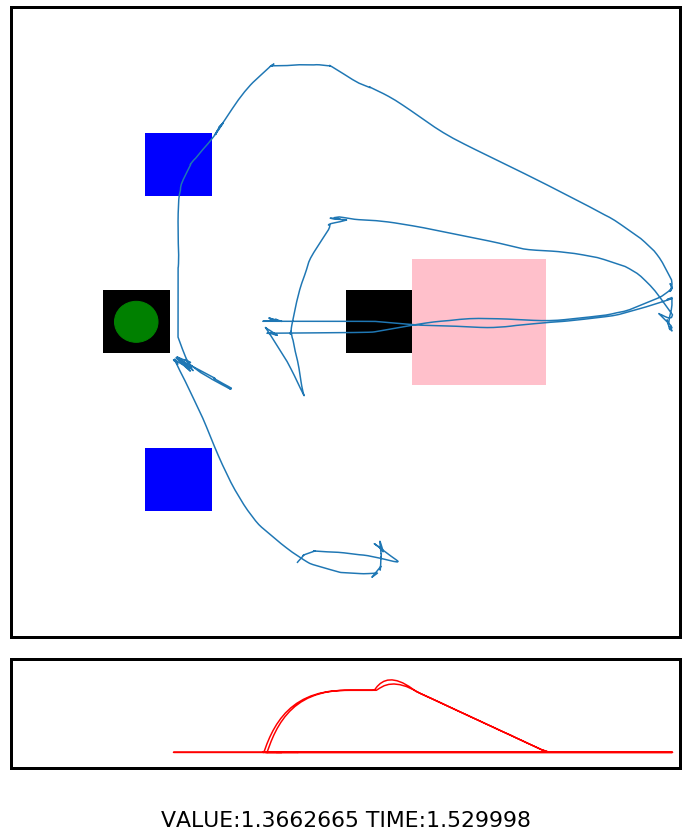

In [111]:
target_f = 1.3662665
box_pos = [[10,10],[10,30]]
plot_trajectory(df3, target_f, box_pos)

/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: `item` has been deprecated and will be removed in a future version


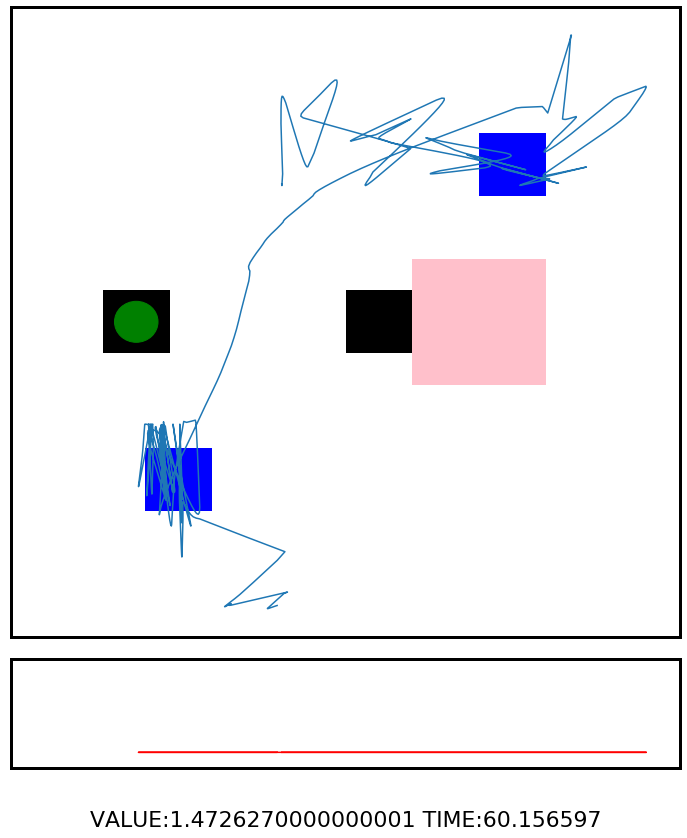

In [114]:
target_f = 1.4726270000000001
box_pos = [[10,10],[30,30]]
plot_trajectory(df3, target_f, box_pos)

/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: `item` has been deprecated and will be removed in a future version


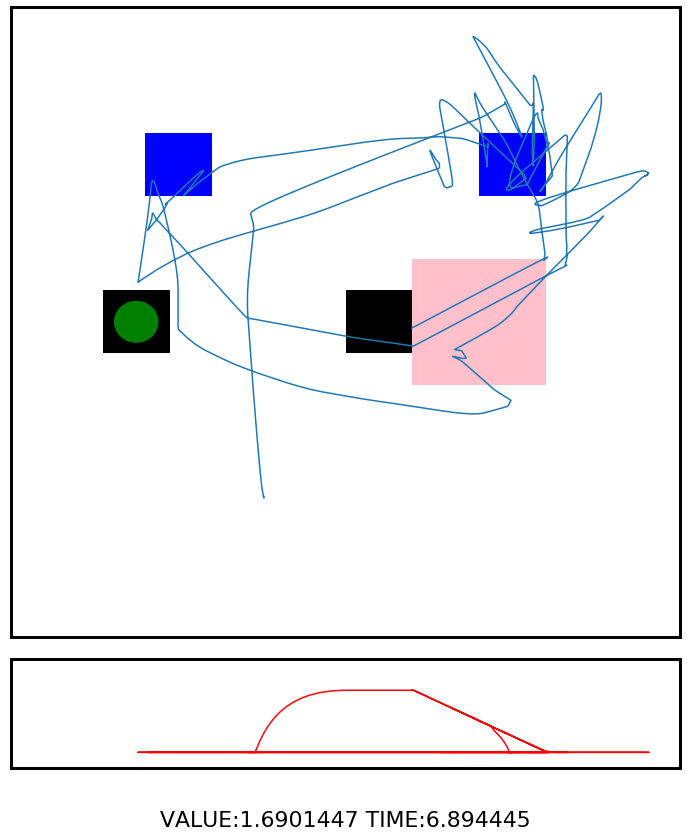

In [115]:
target_f = 1.6901447
box_pos = [[10,30],[30,30]]
plot_trajectory(df3, target_f, box_pos)


/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: `item` has been deprecated and will be removed in a future version


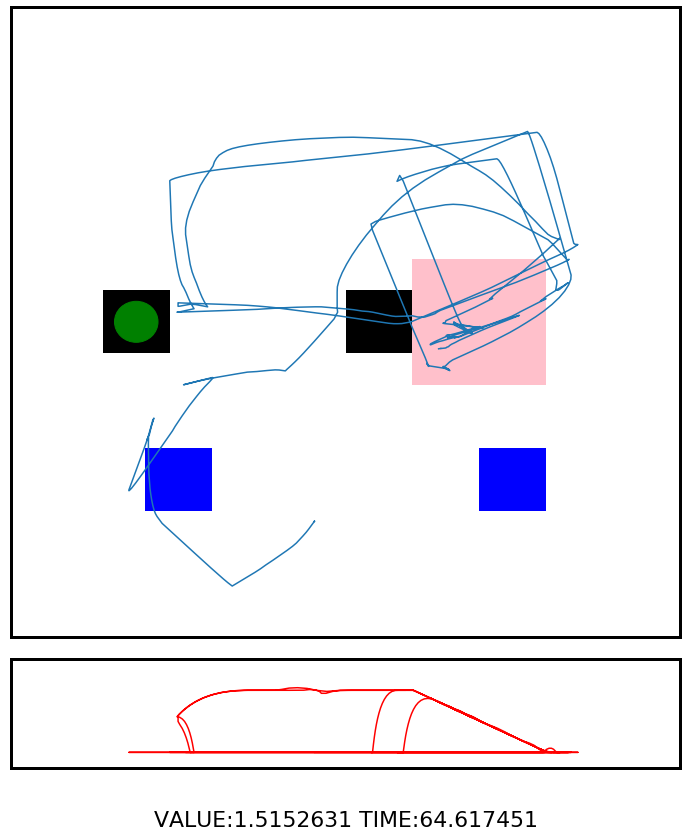

In [117]:
target_f = 1.5152631
box_pos = [[10,10],[30,10]]
plot_trajectory(df3, target_f, box_pos)

/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: `item` has been deprecated and will be removed in a future version


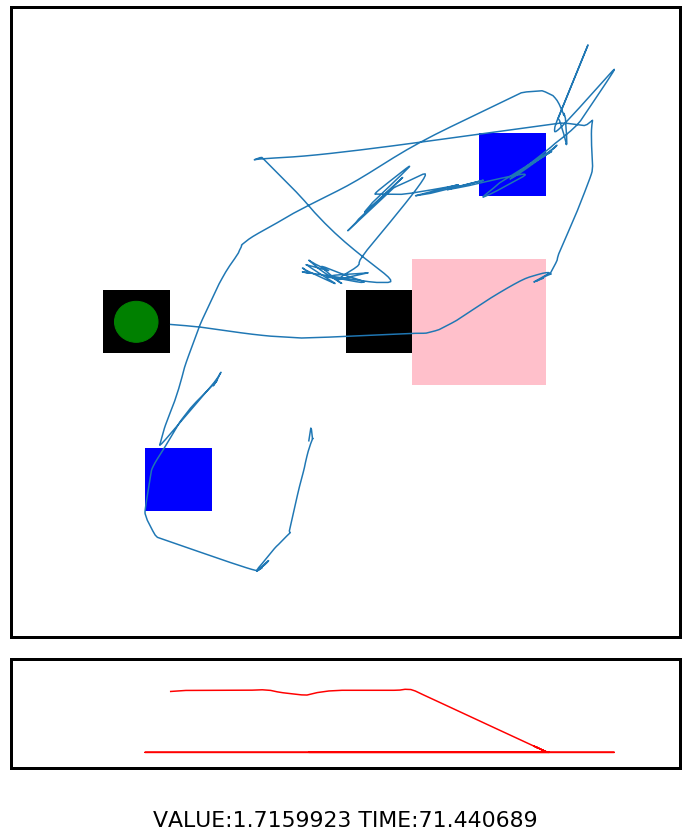

In [118]:
target_f = 1.7159923
box_pos = [[10,10],[30,30]]
plot_trajectory(df3, target_f, box_pos)

<Figure size 792x792 with 0 Axes>

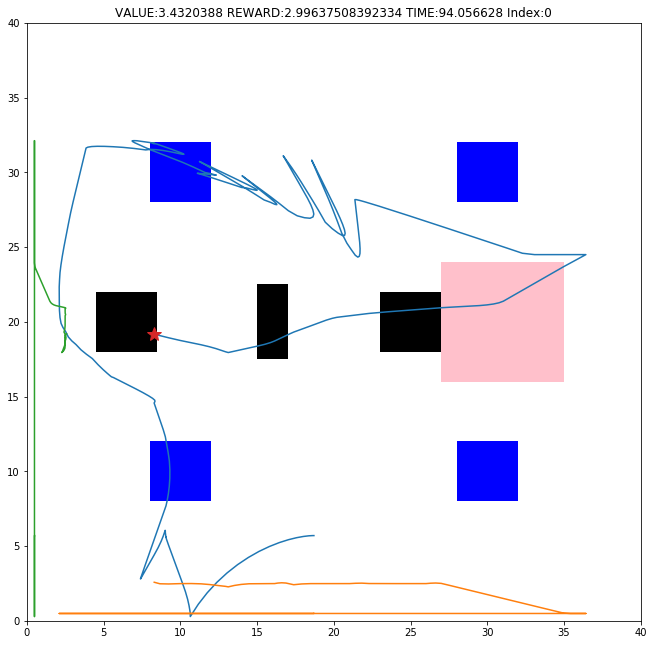

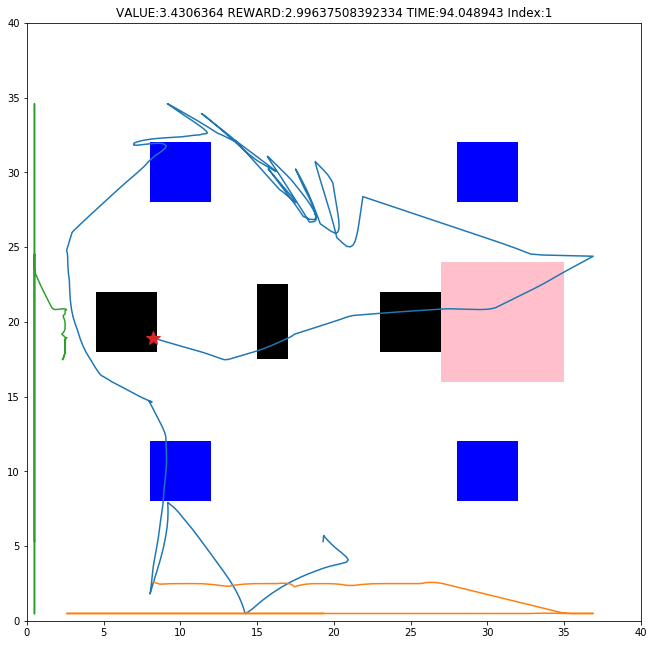

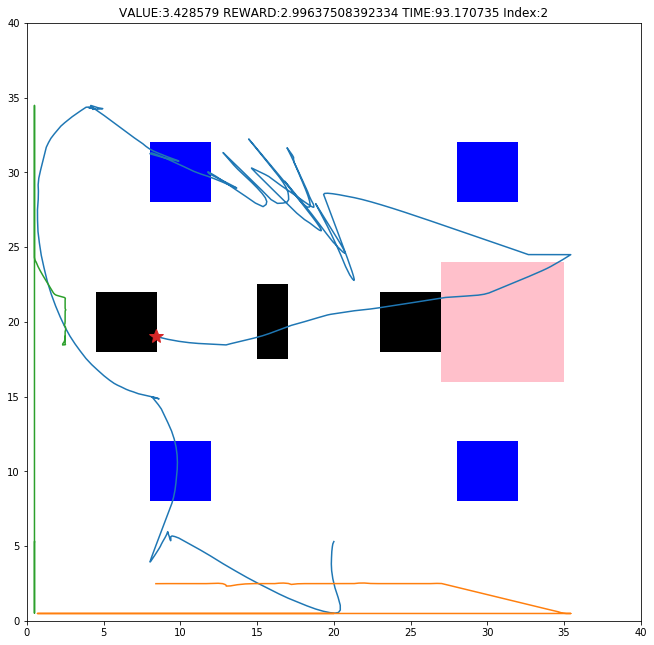

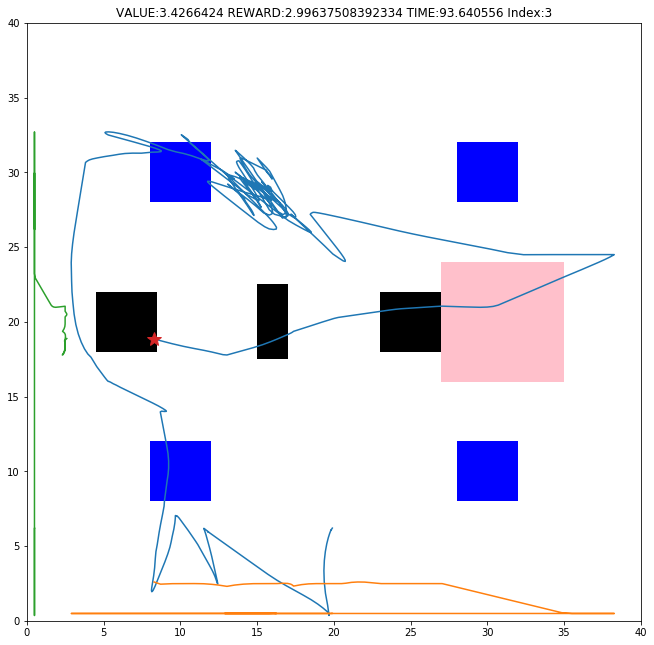

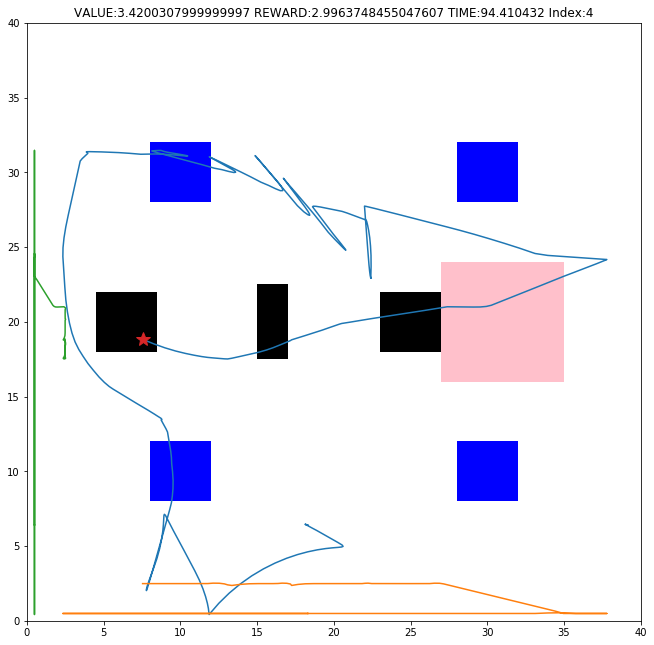

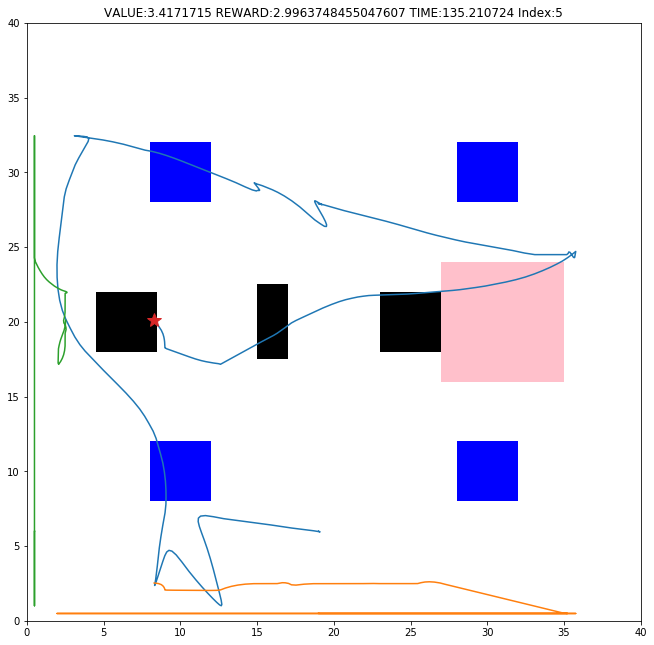

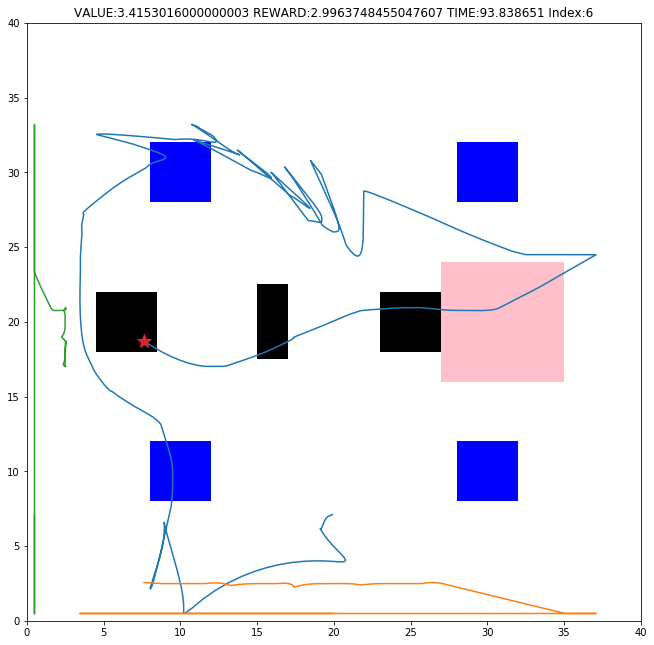

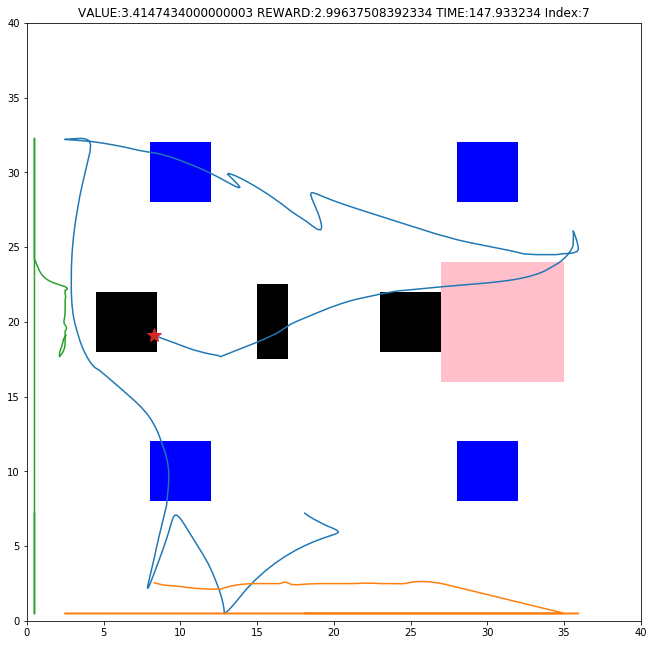

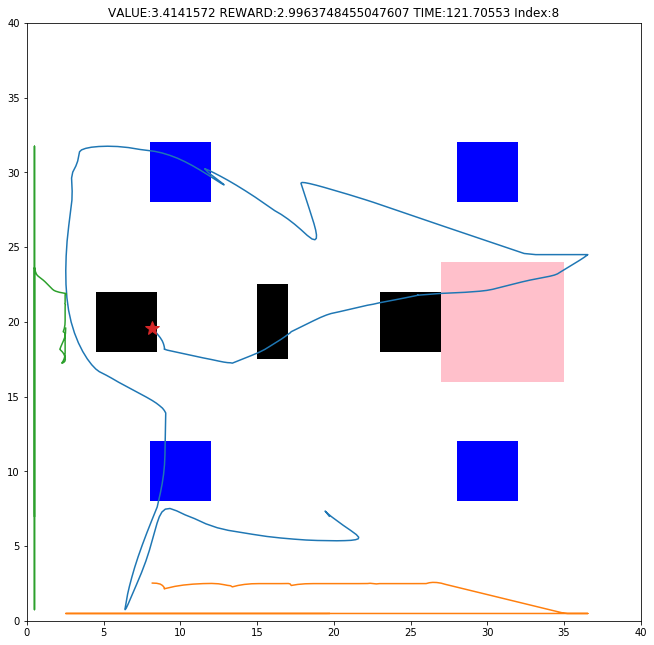

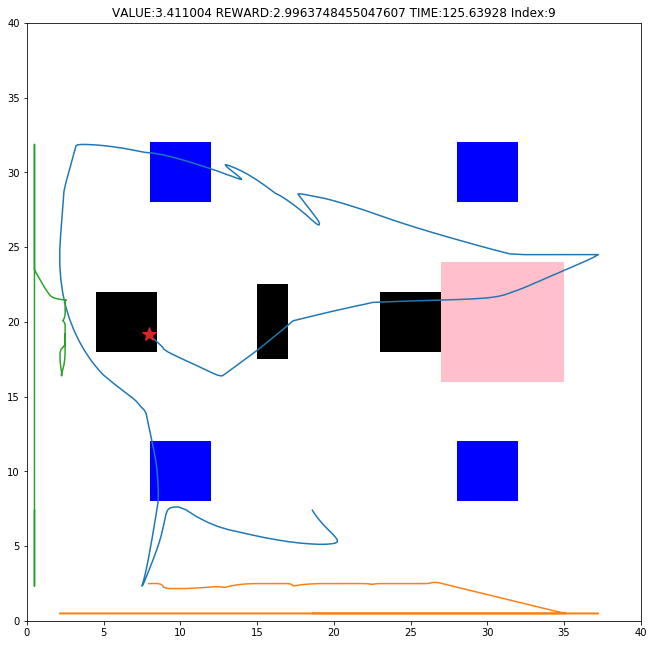

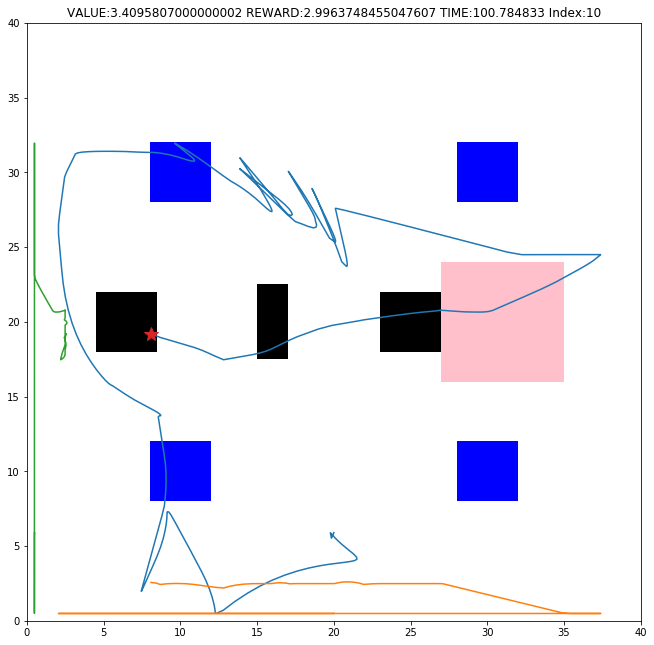

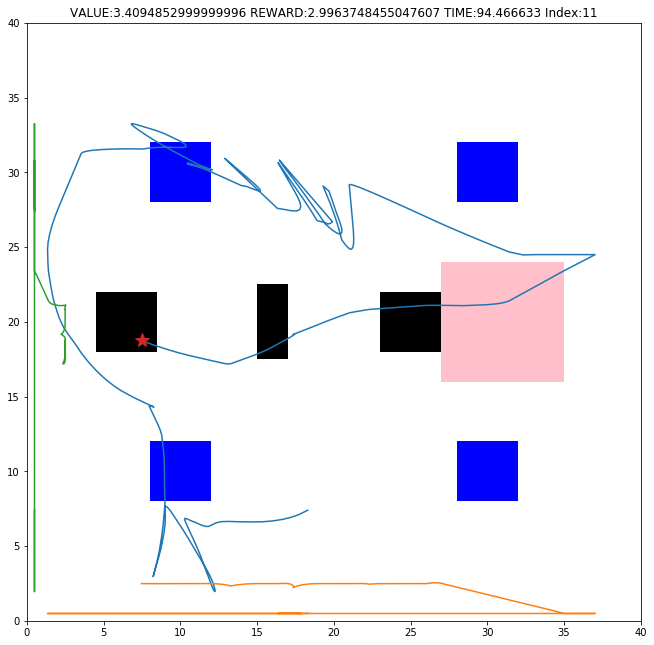

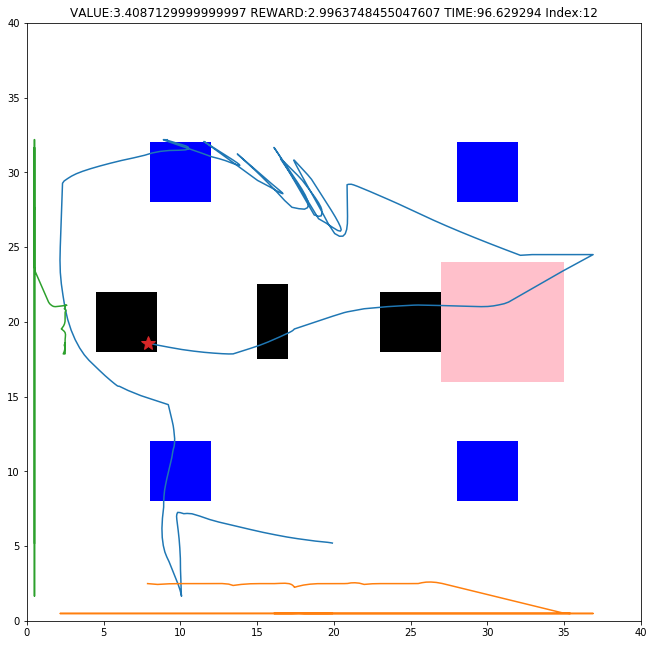

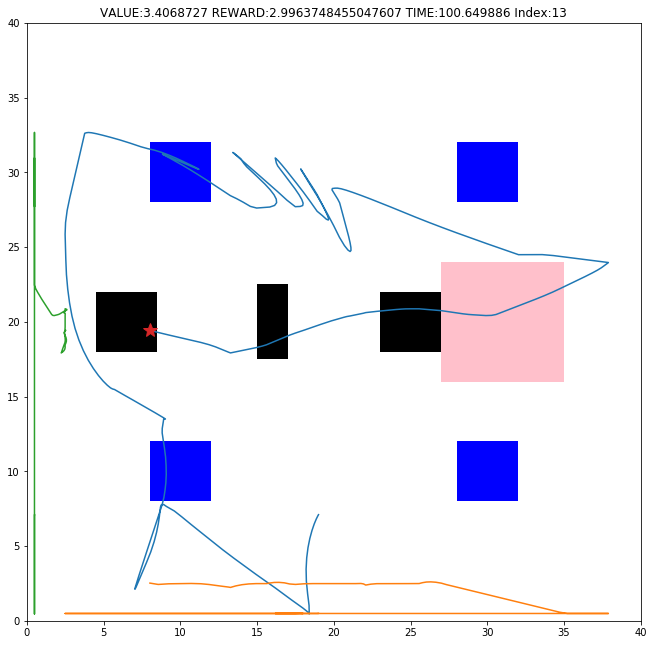

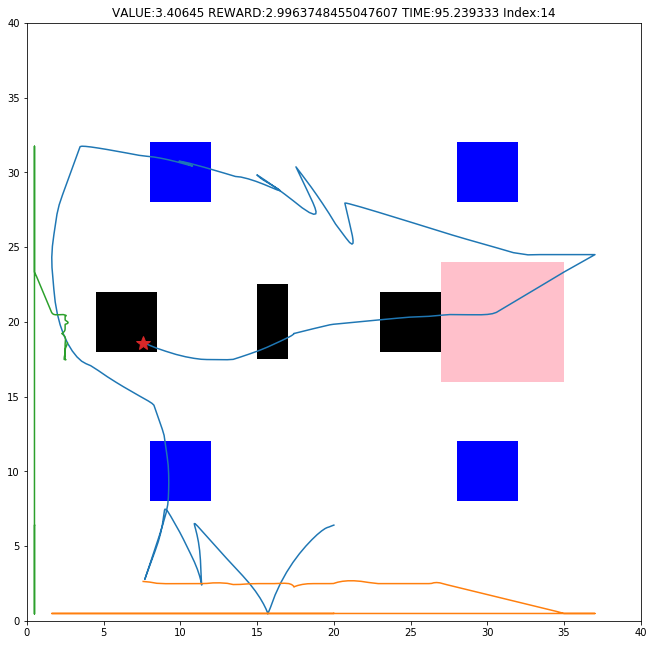

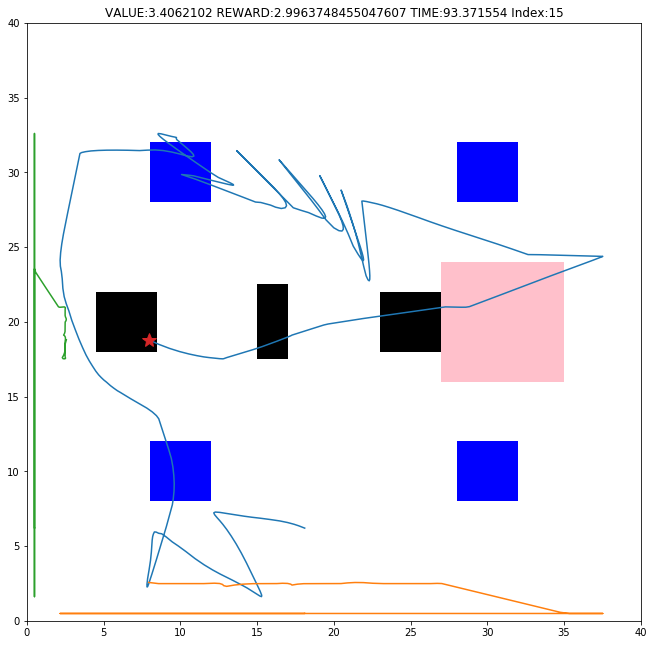

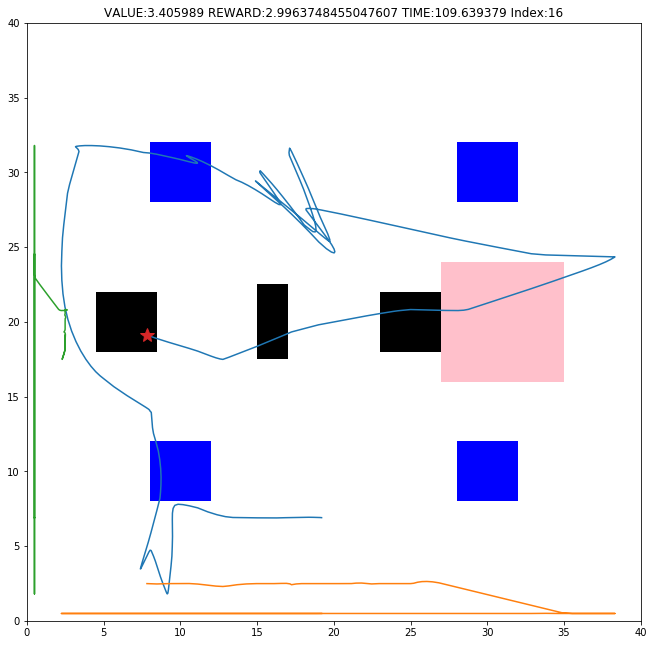

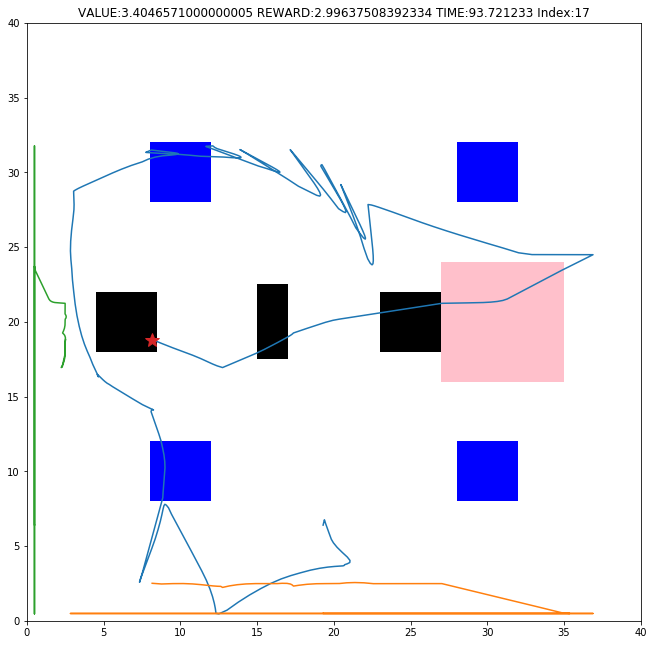

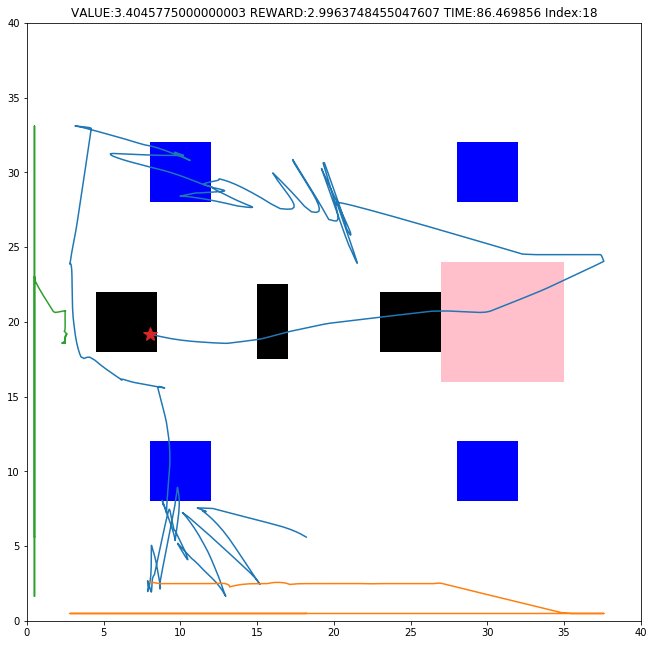

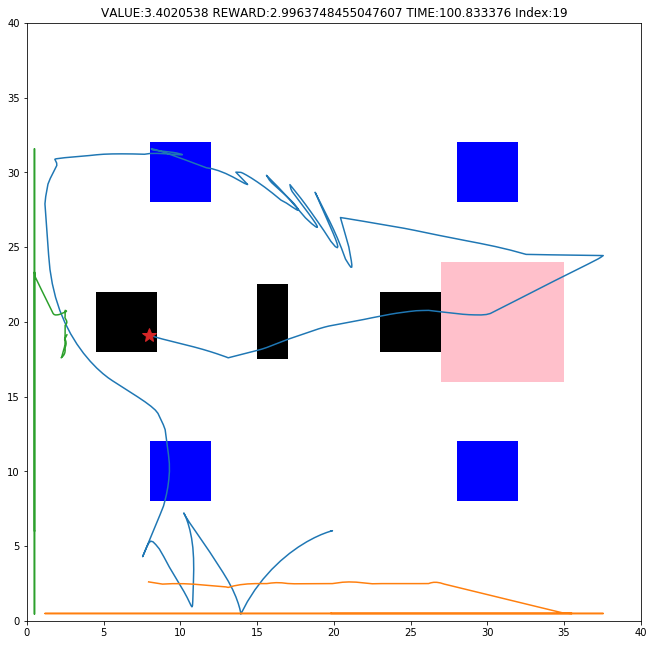

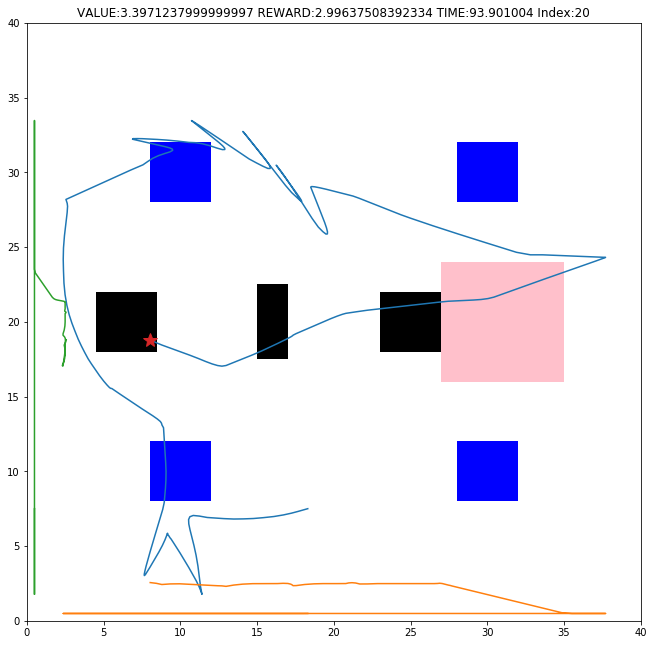

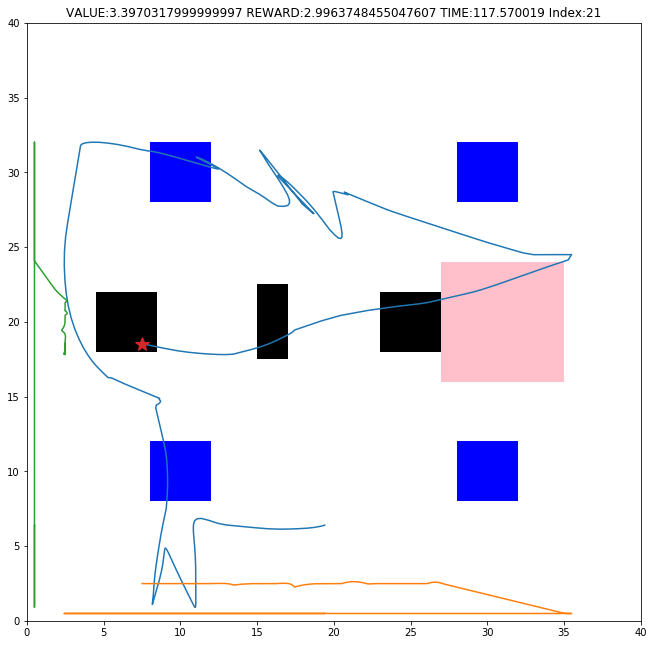

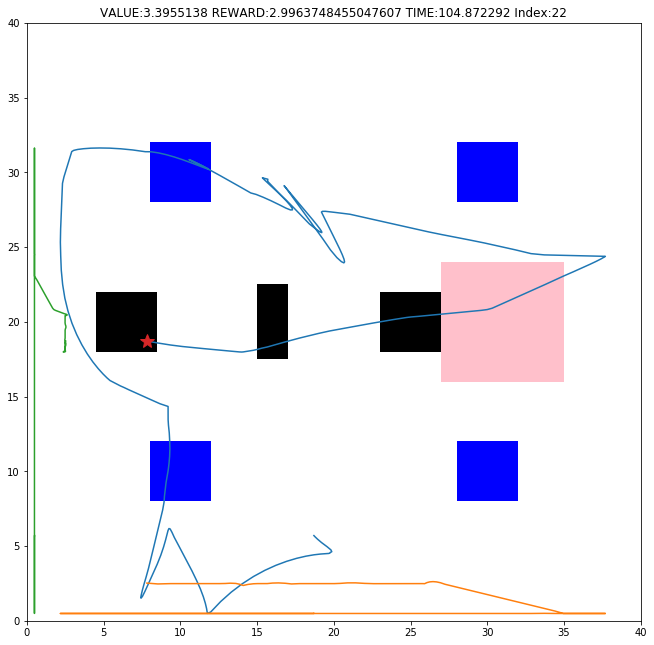

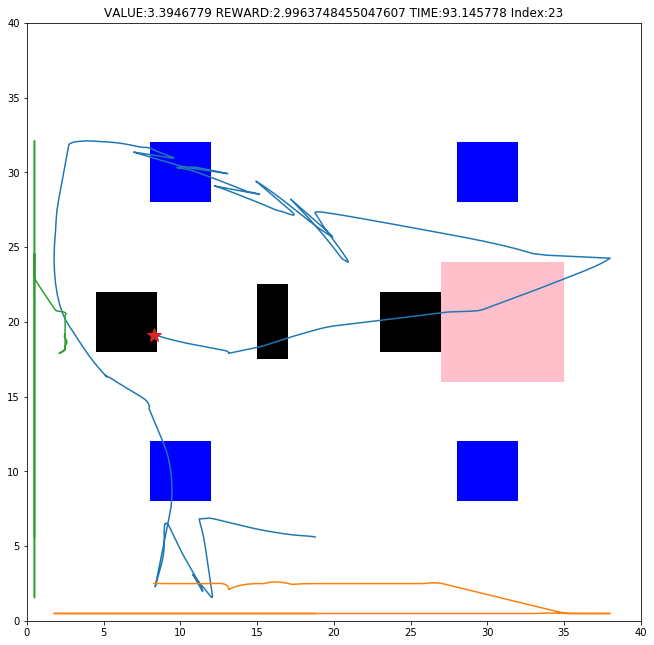

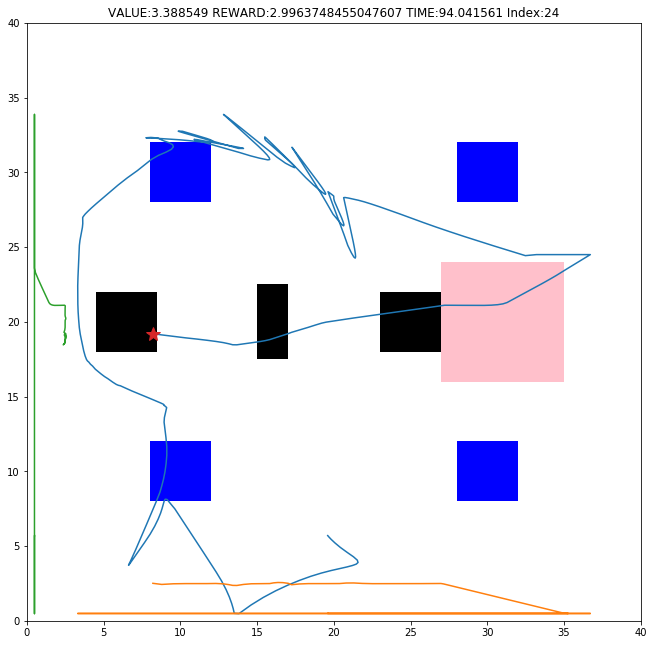

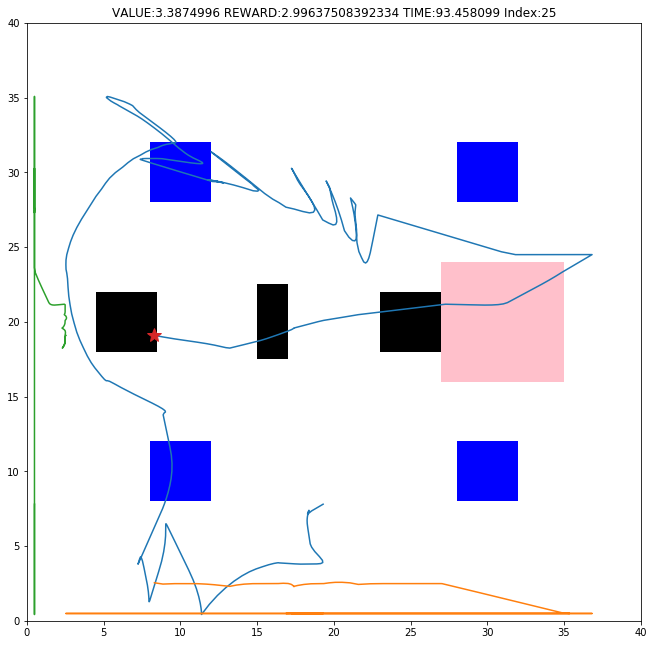

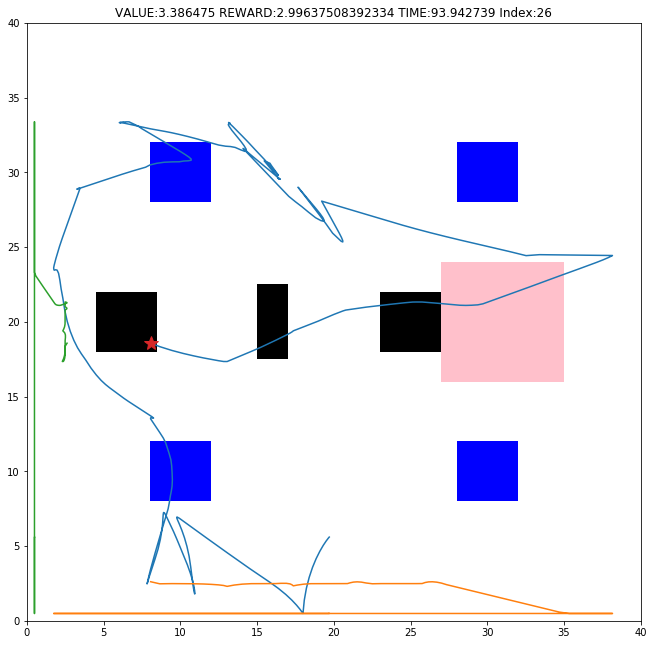

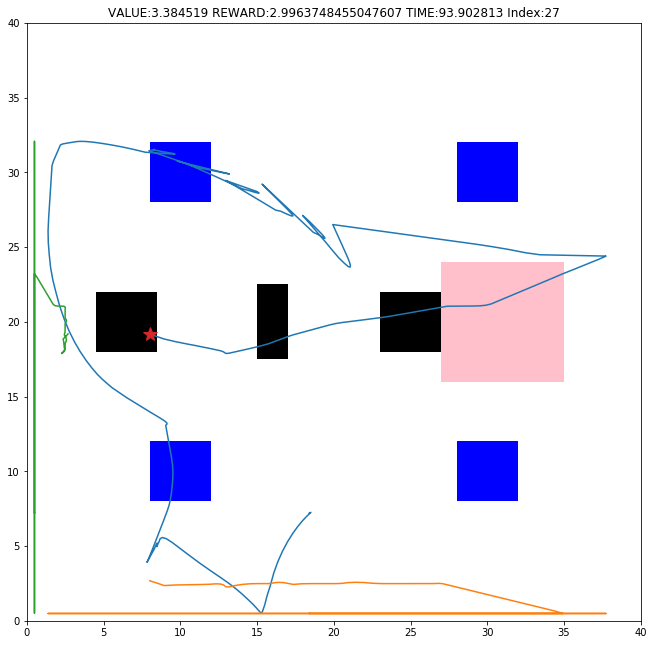

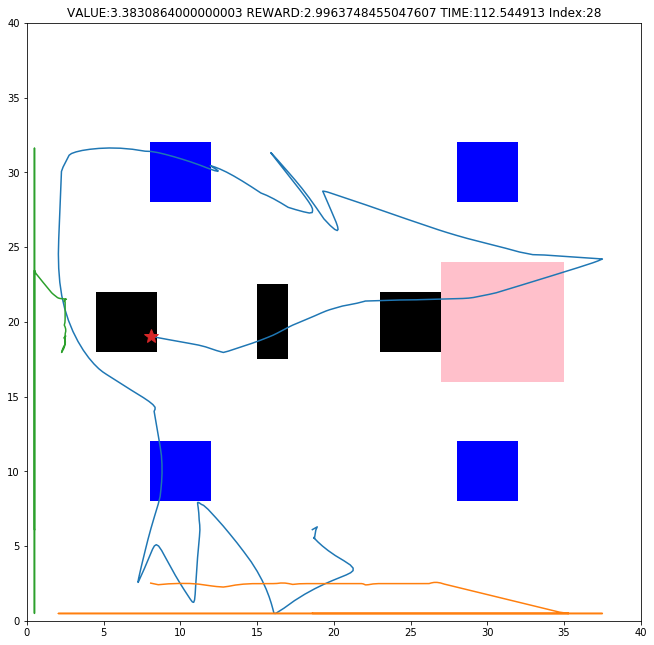

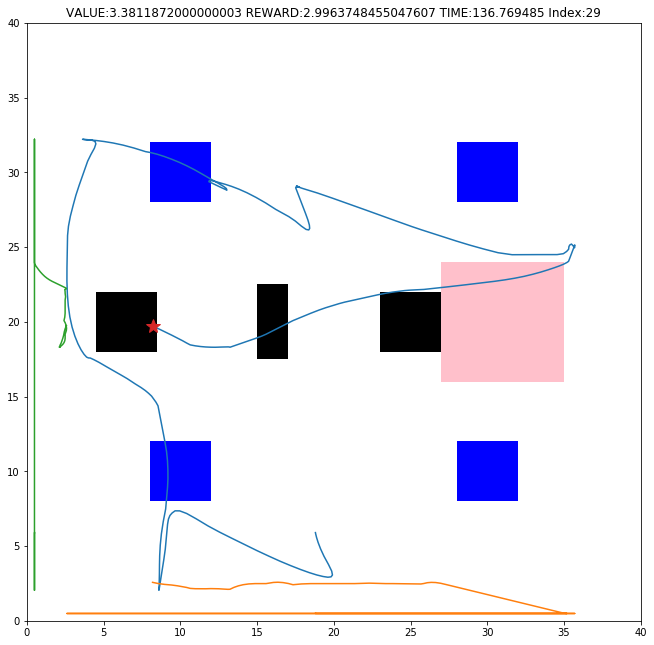

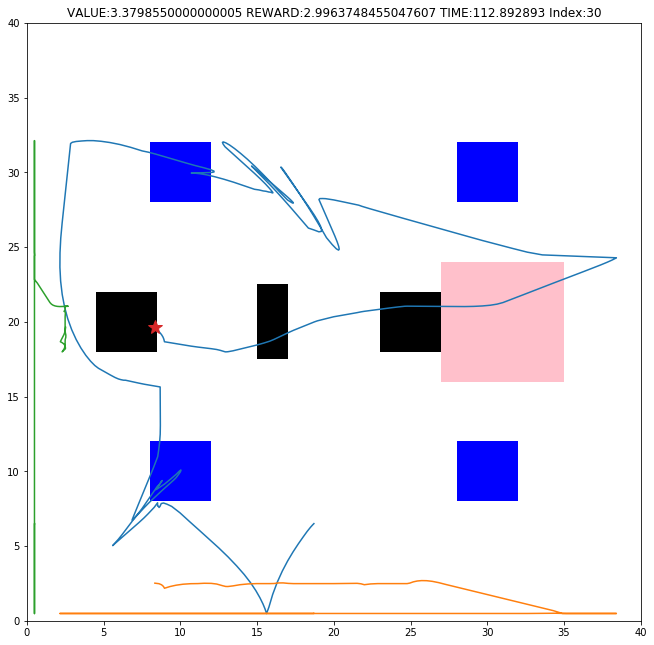

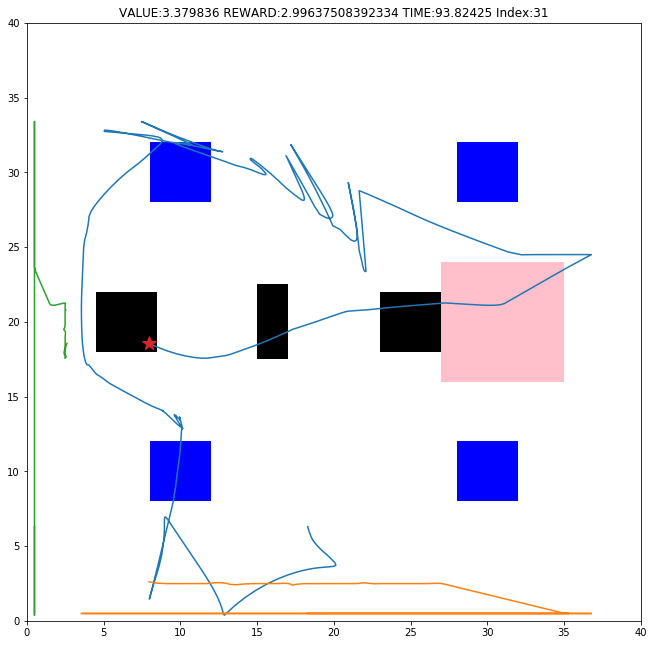

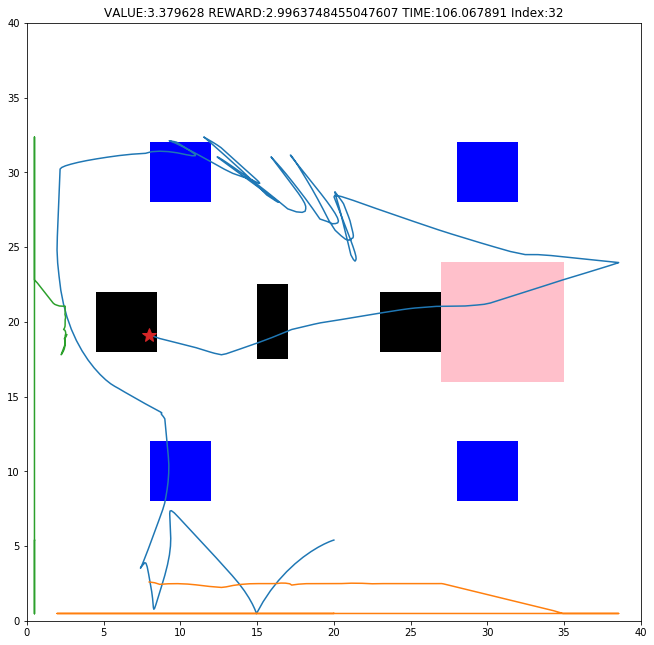

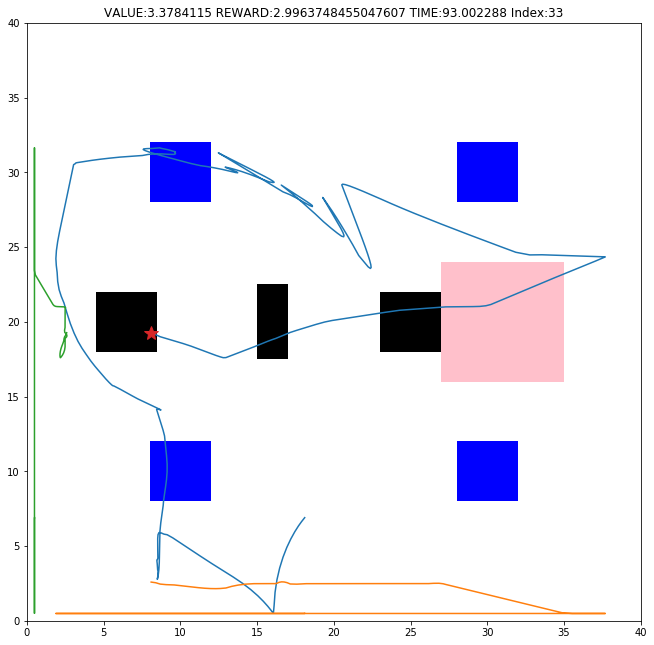

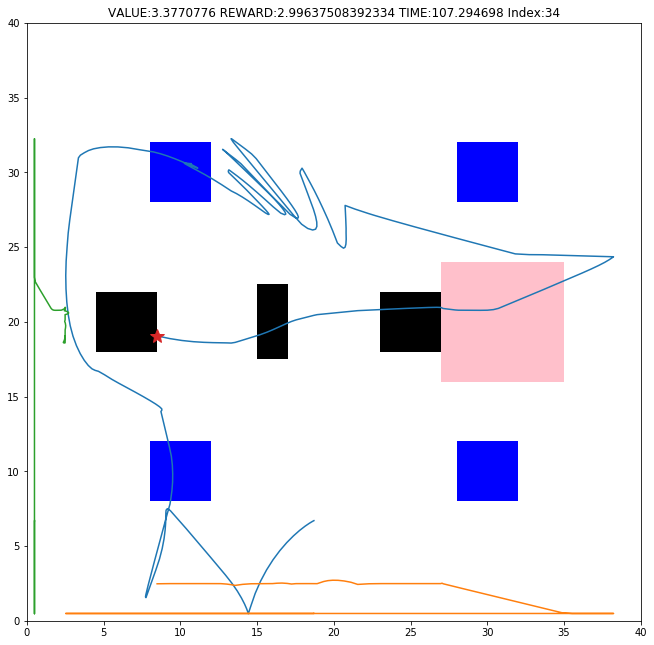

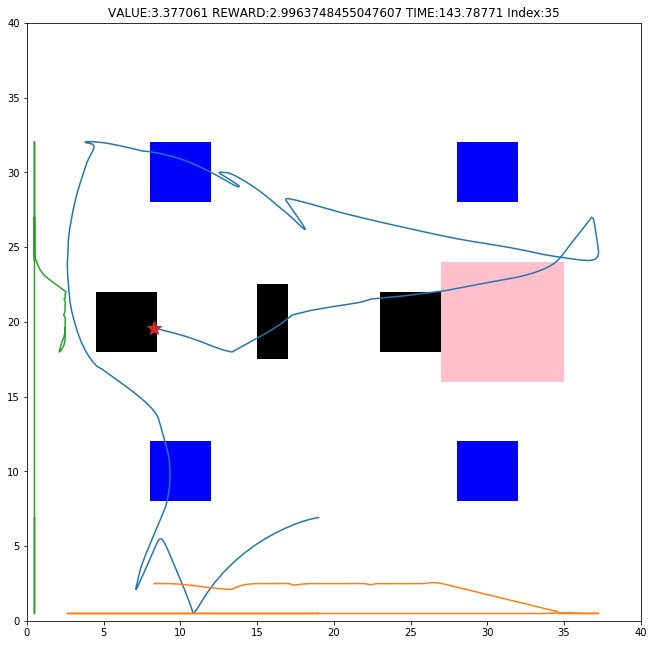

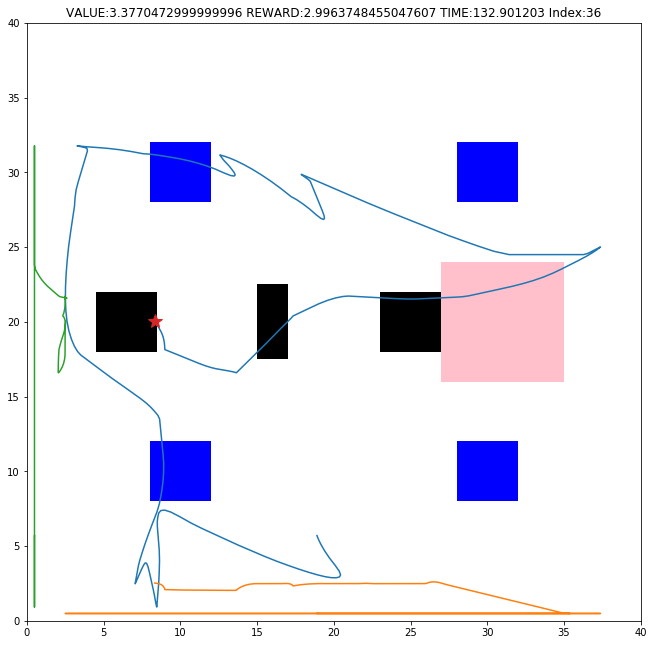

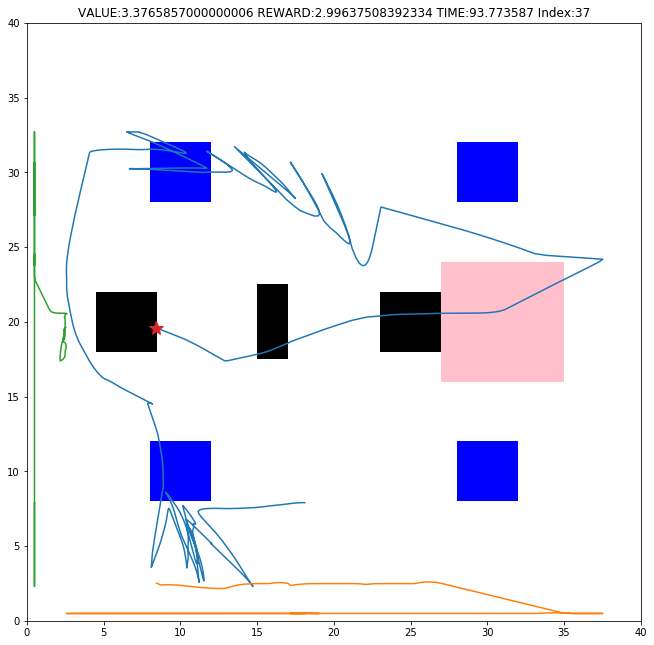

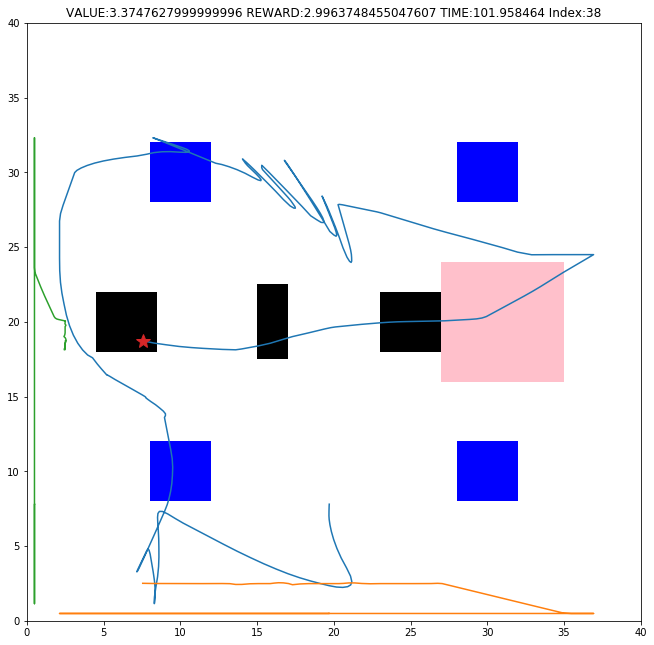

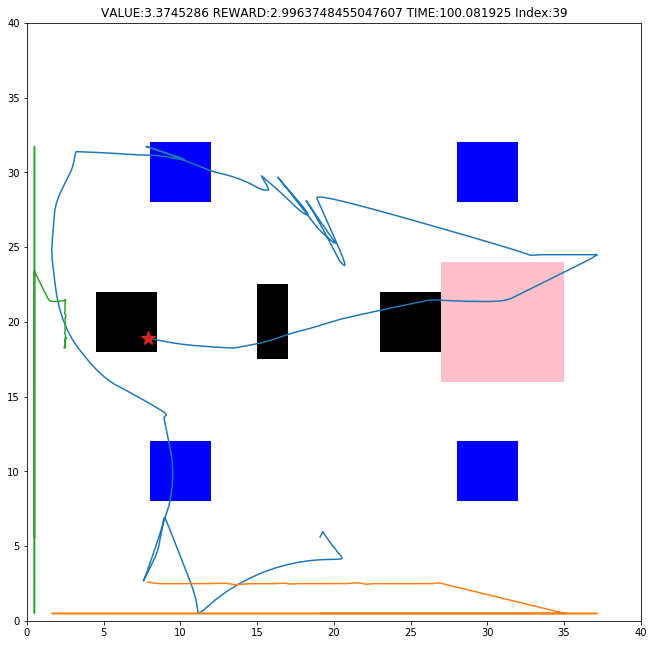

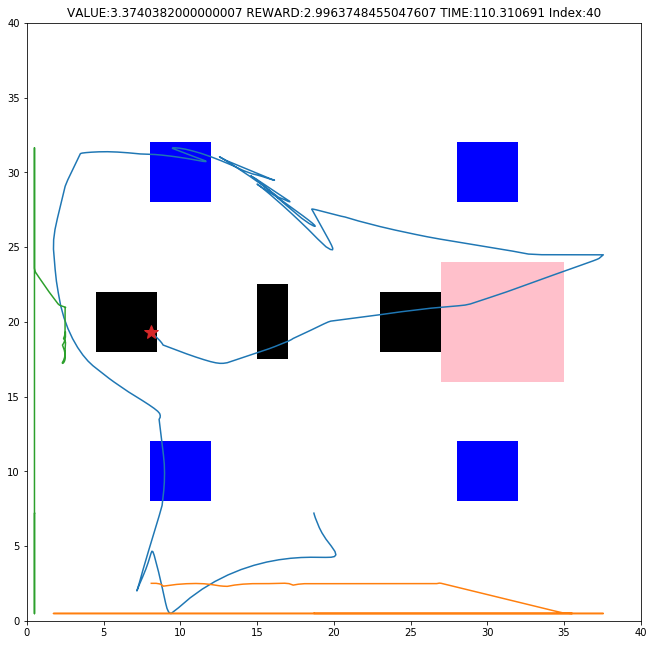

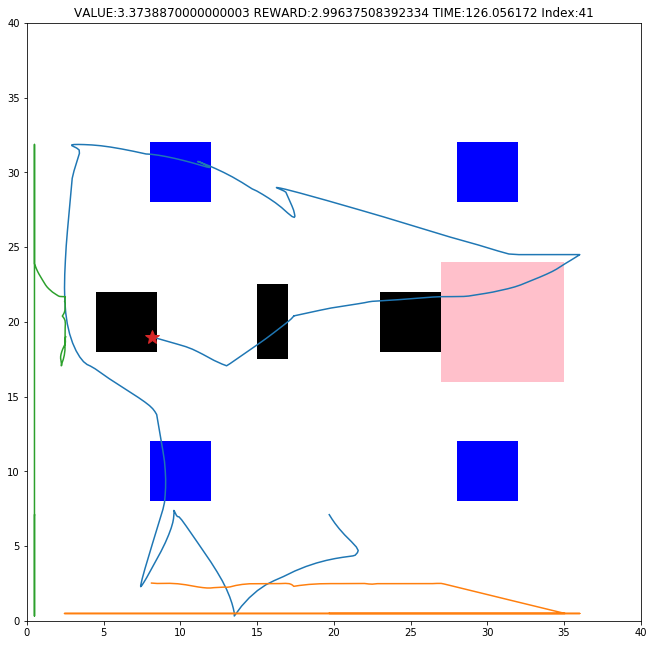

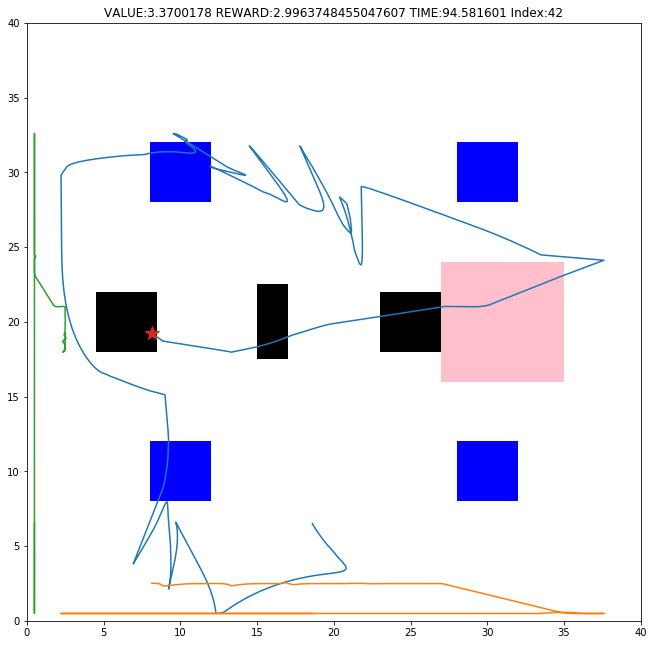

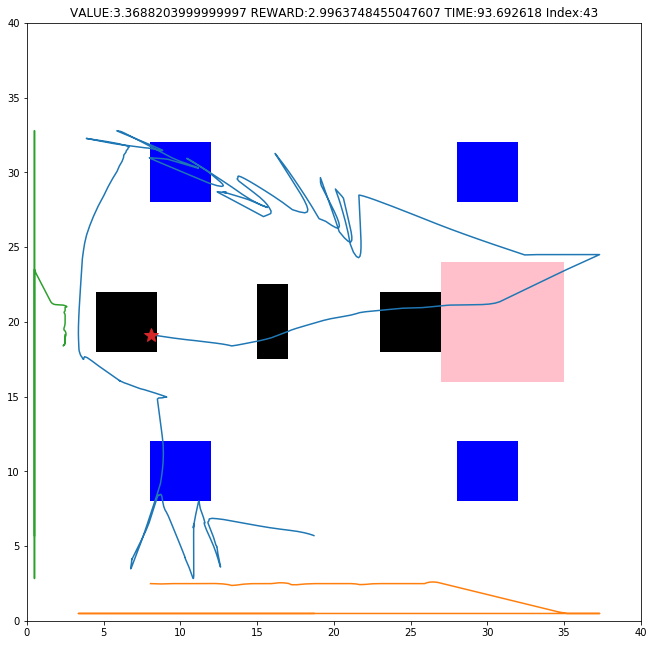

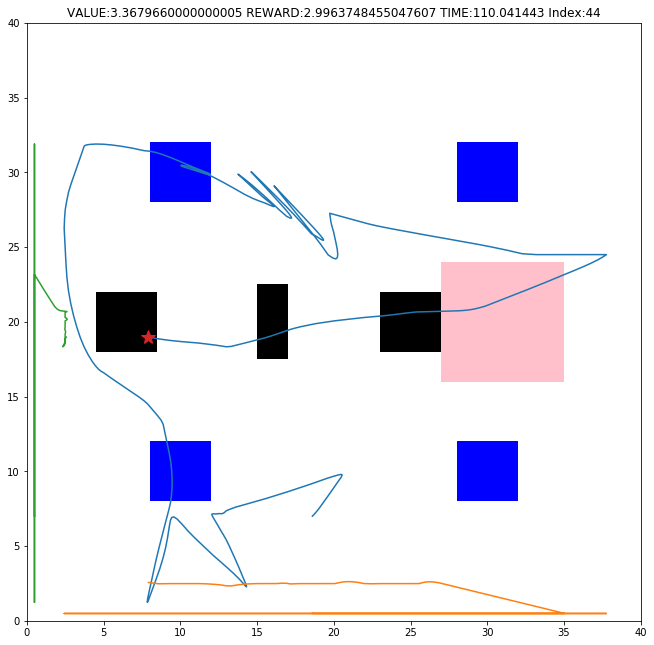

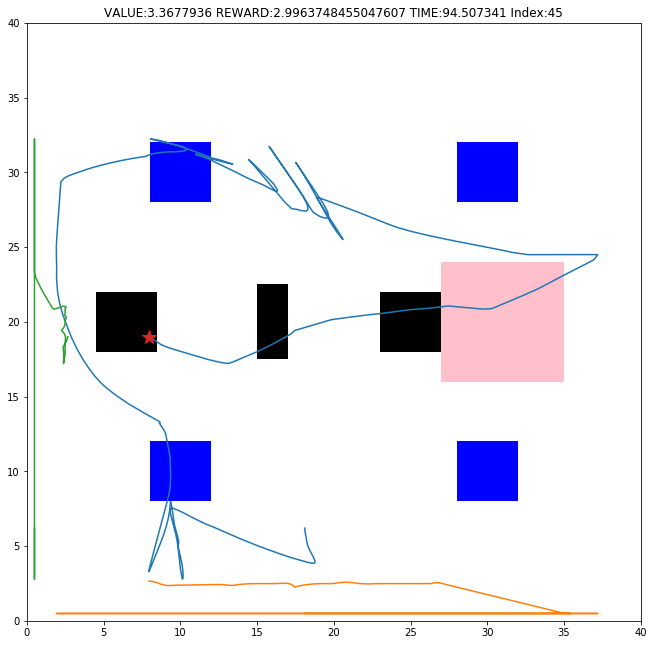

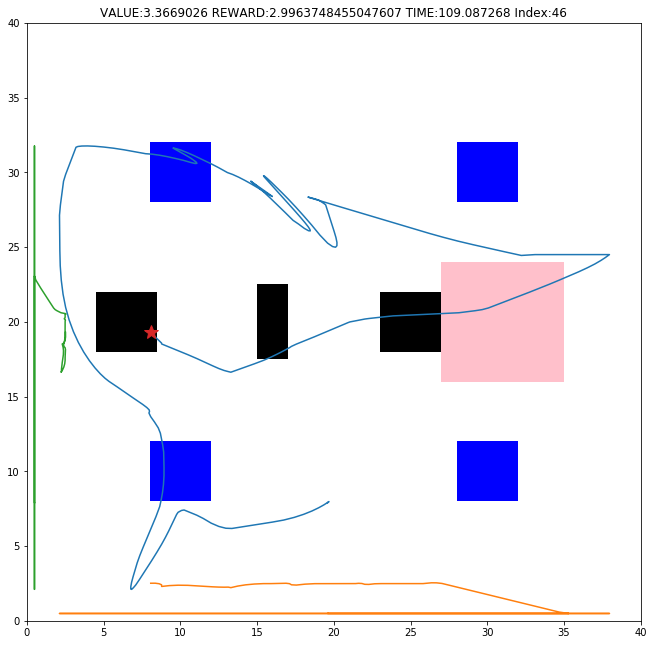

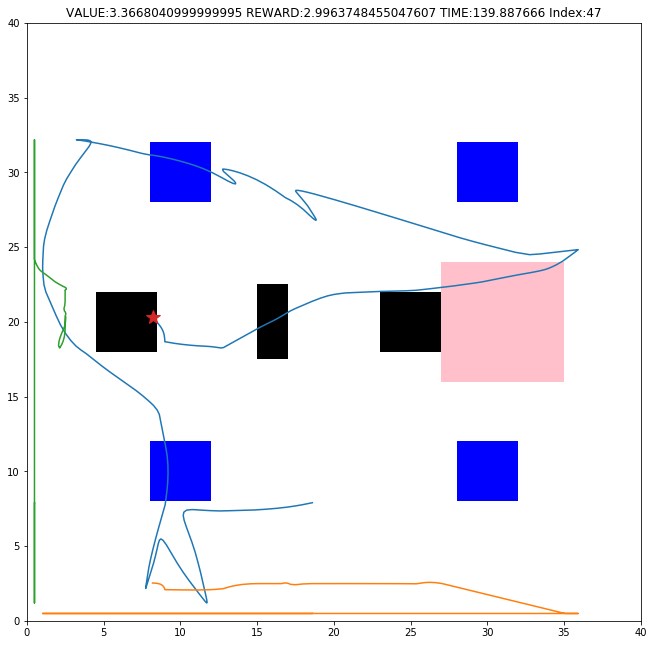

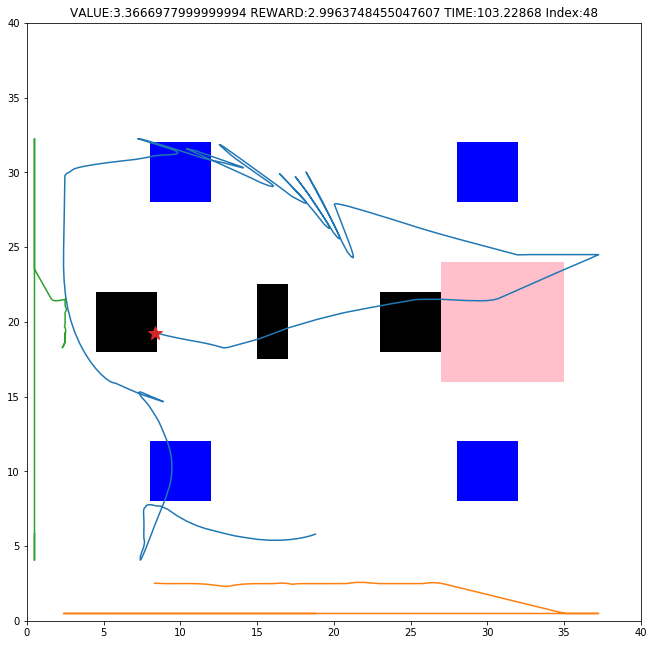

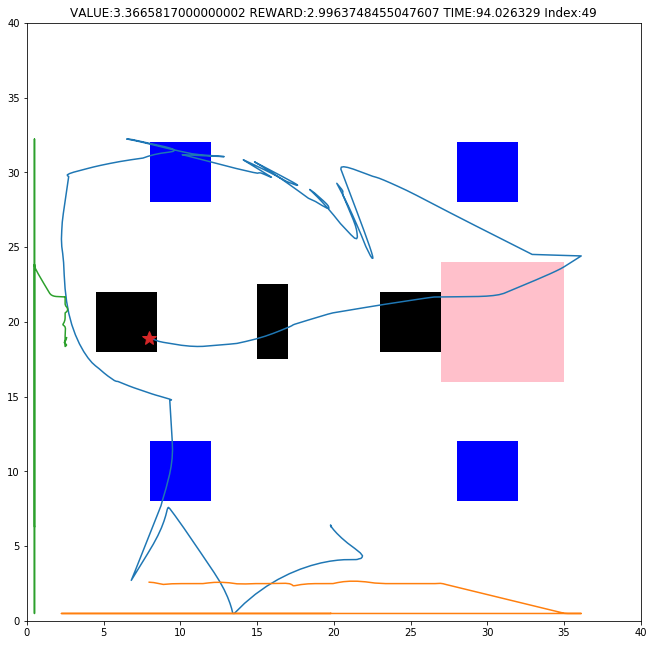

In [8]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pyplot as plt
import numpy as np
import argparse
import os
import pandas as pd



num_good_traj = 0
my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_190'
exps = glob(my_dir+'*')
fig = plt.figure(clear=True, figsize=(11,11))

d = exps[0]

df = load_results(d)
df2 = pd.DataFrame() 

df['f']= df['l'].cumsum()/1000000


df['perf']= df['ereward']/(df['max_reward'])
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold

df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])

time_limit = 0

df3 = df.where((df['f']>time_limit)&(df['max_value_error'] == 0)).sort_values(by=['value'], ascending=False)
#df3 = df.where((df['max_value_error'] == 0)&(df['value'] != 0)).sort_values(by=['f'], ascending=False)

for ii in range(50):
    max_index = ii
    X = eval(df3['X'].iloc[max_index])[0:-1]
    Y = eval(df3['Y'].iloc[max_index])[0:-1]
    Z = eval(df3['Z'].iloc[max_index])[0:-1]
    fig = plt.figure(clear=True, figsize=(11,11))
    plt.plot(X, Z)
    plt.plot(X, Y)
    plt.plot(Y, Z)
    plt.plot(X[-1],Z[-1],"*",markersize=15)
    


    rectangle = plt.Rectangle((10 - 2,30- 2), 4, 4, fc='blue')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((30 -2,10- 2), 4, 4, fc='blue')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((30 -2,30- 2), 4, 4, fc='blue')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((10 -2,10- 2), 4, 4, fc='blue')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((31 -4,20- 4), 8, 8, fc='pink')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((6.5 -2,20- 2), 4, 4, fc='black')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((25 -2,20 -2), 4, 4, fc='black')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((16 -1,20 -2.5), 2, 5, fc='black')
    plt.gca().add_patch(rectangle)

    plt.xlim(0,40)
    plt.ylim(0,40)
    plt.title('VALUE:{} REWARD:{} TIME:{} Index:{}'.format(df3['value'].iloc[max_index], df3['reward_woD'].iloc[max_index],df3['f'].iloc[max_index], ii))
    plt.show()

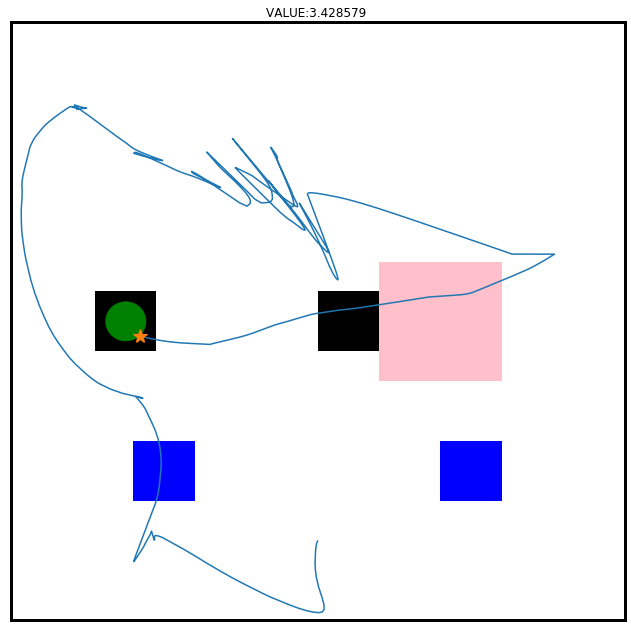

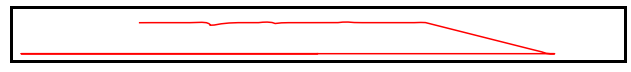

In [9]:
max_index = 2
X = eval(df3['X'].iloc[max_index])[0:-1]
Y = eval(df3['Y'].iloc[max_index])[0:-1]
Z = eval(df3['Z'].iloc[max_index])[0:-1]
fig = plt.figure(clear=True, figsize=(11,11))
ax = fig.gca()
ax.plot(X, Z)

plt.plot(X[-1],Z[-1],"*",markersize=15)



rectangle = plt.Rectangle((30 -2,10- 2), 4, 4, fc='blue')
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((10 -2,10- 2), 4, 4, fc='blue')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((28 -4,20- 4), 8, 8, fc='pink')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((7.5 -2,20- 2), 4, 4, fc='black')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((22 -2,20 -2), 4, 4, fc='black')
plt.gca().add_patch(rectangle)
ball = plt.Circle((7.5 ,20), 1.3, color='g', clip_on=False)
plt.gca().add_patch(ball)


plt.xticks(ticks=[])
plt.yticks(ticks=[])

plt.xlim(0,40)
plt.ylim(0,40)
plt.title('VALUE:{} '.format(df3['value'].iloc[max_index]))
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
plt.show()
fig = plt.figure(clear=True, figsize=(11,1))
ax = fig.gca()
ax.plot(X, Y, 'r')
plt.xlim(0,40)
plt.ylim(0, 3.5)

plt.xticks(ticks=[])
plt.yticks(ticks=[])
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)

plt.show()

<Figure size 792x792 with 0 Axes>

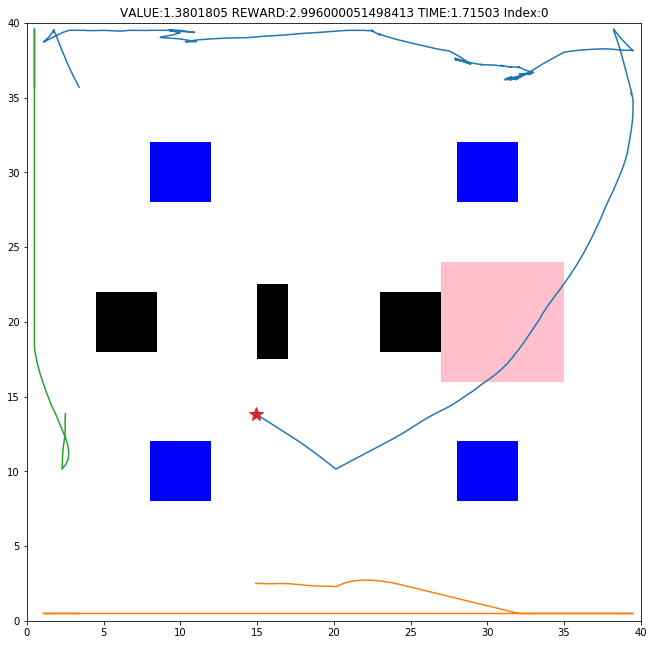

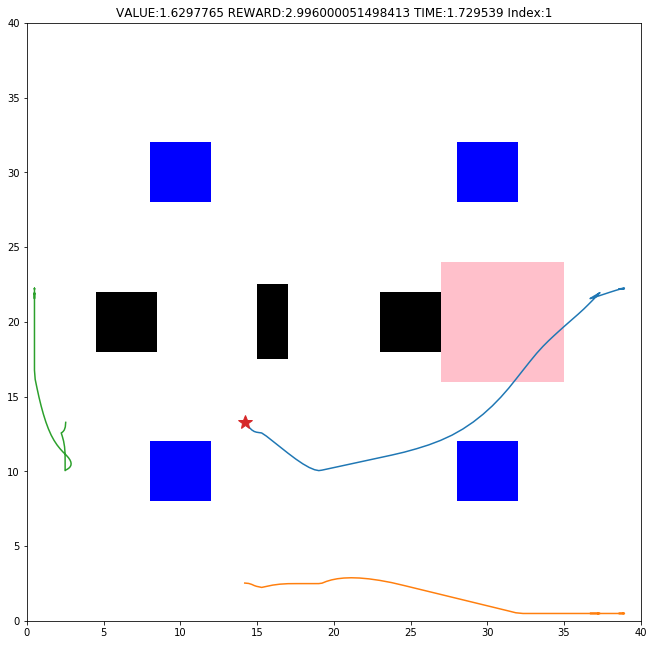

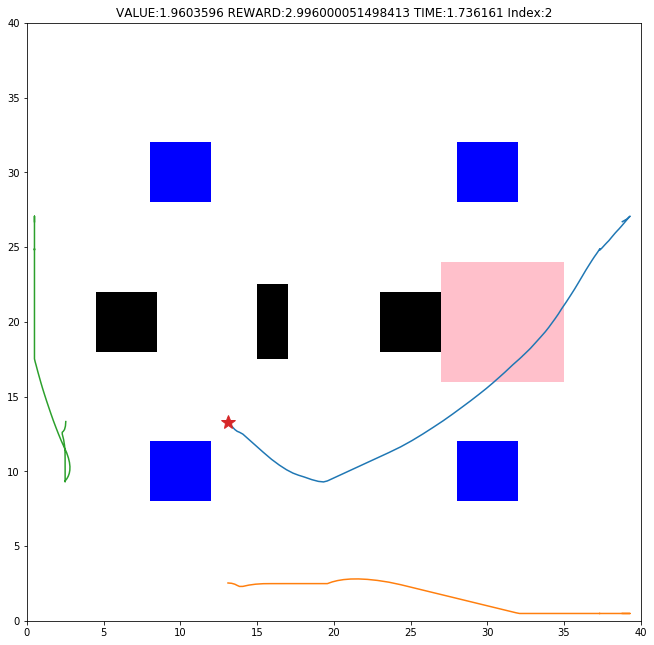

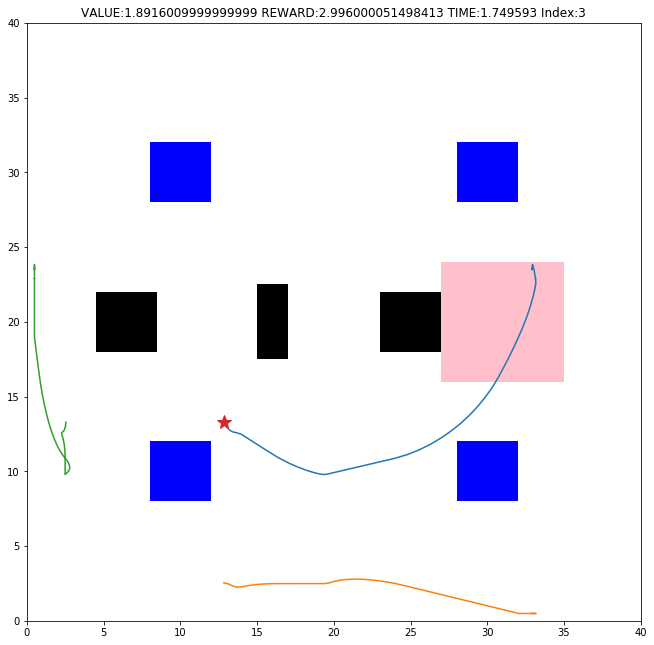

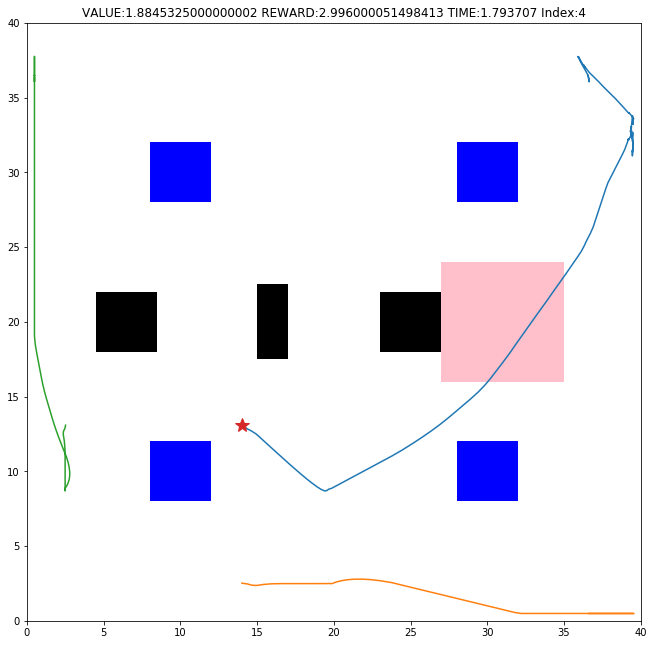

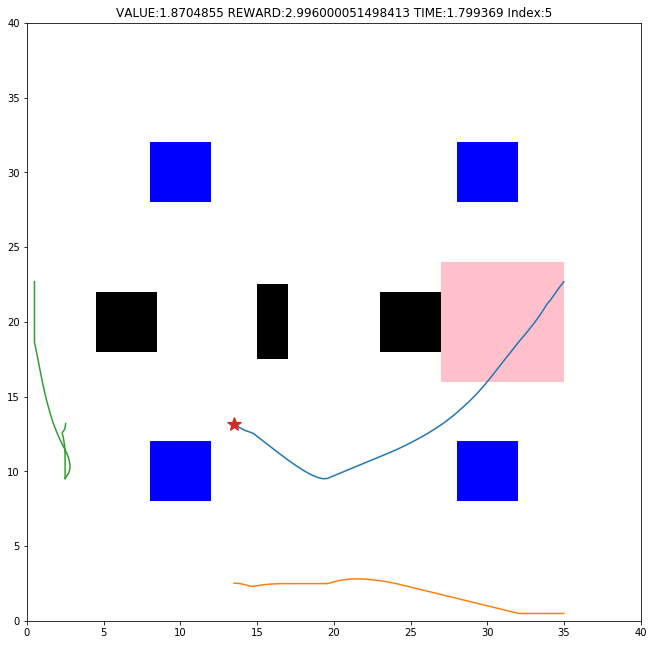

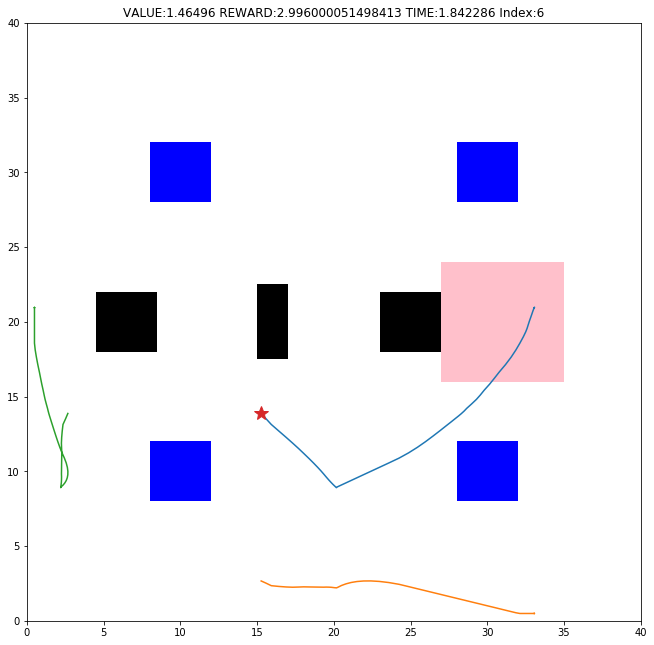

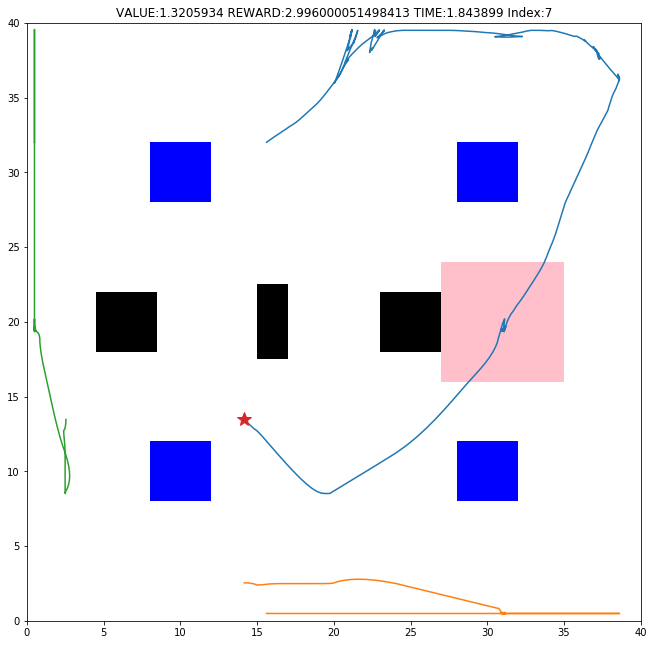

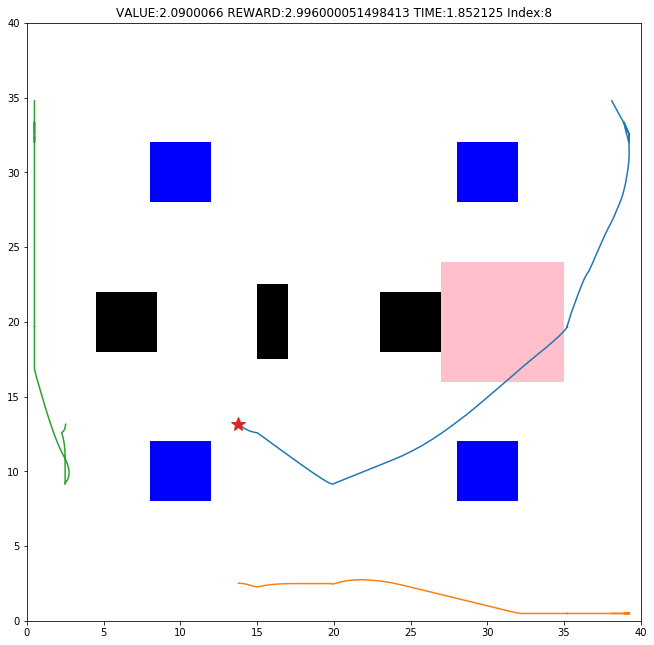

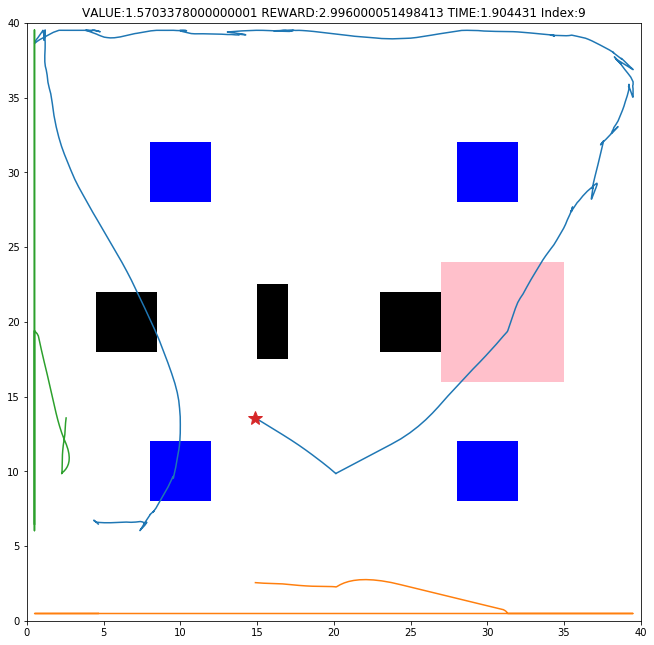

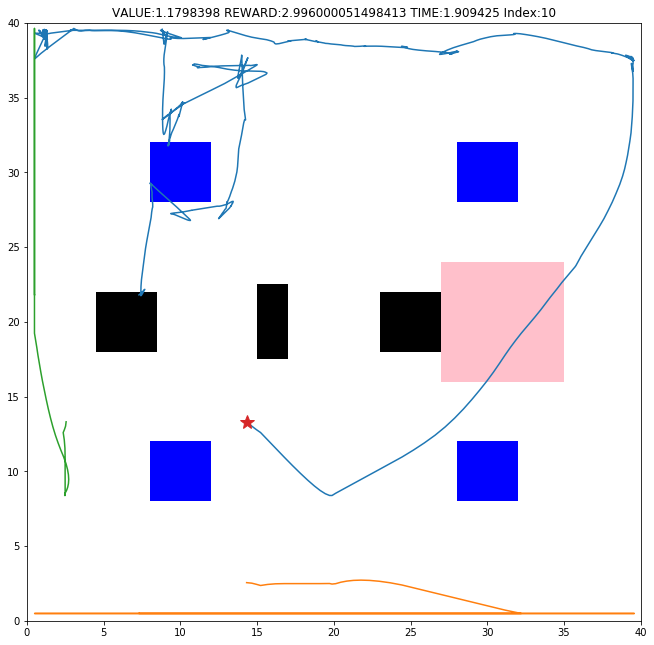

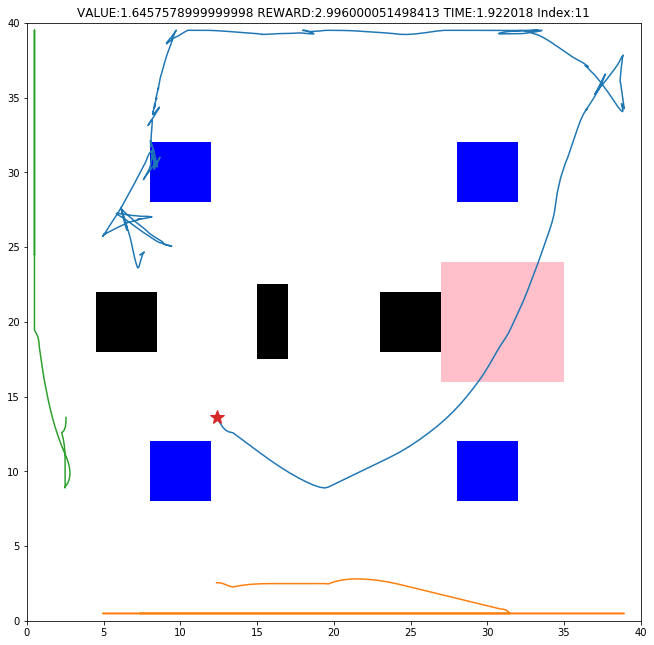

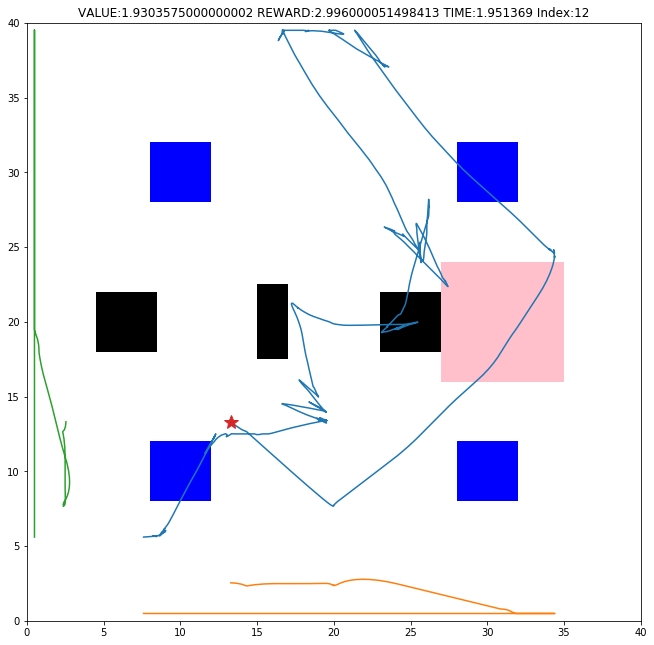

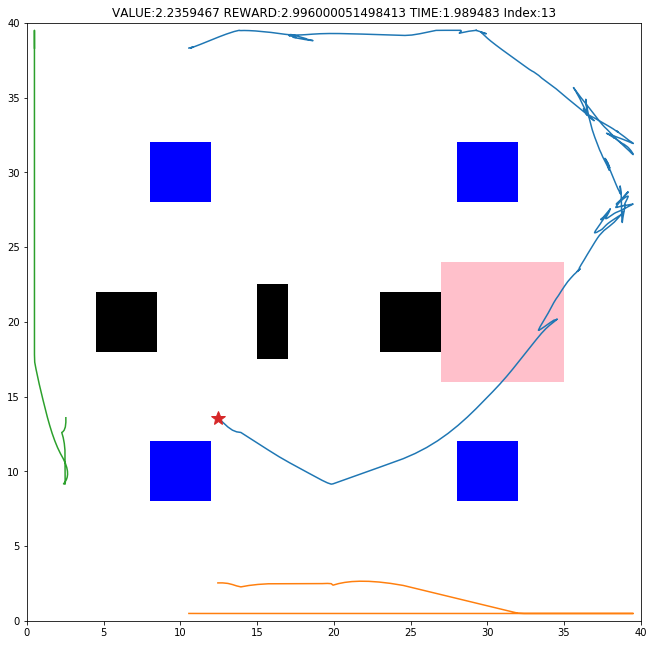

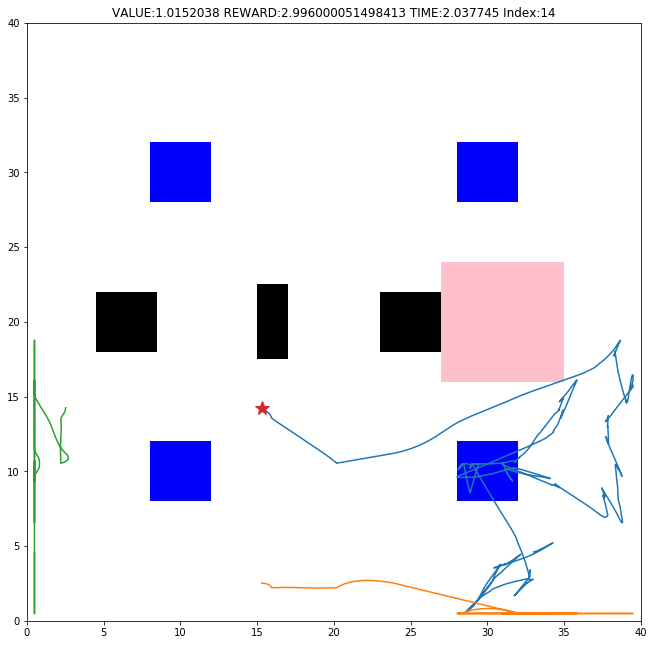

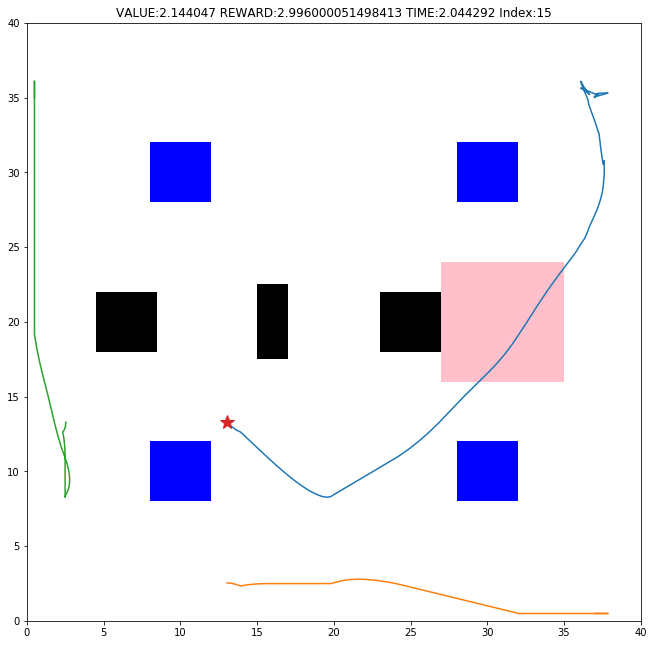

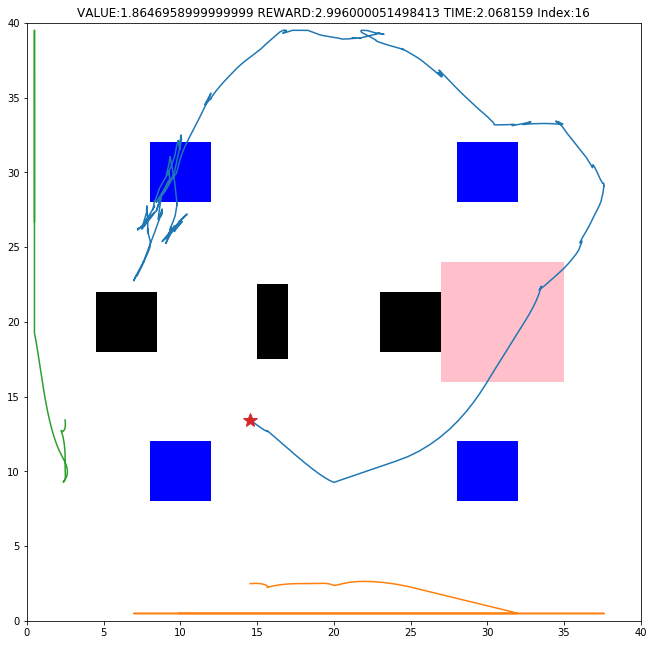

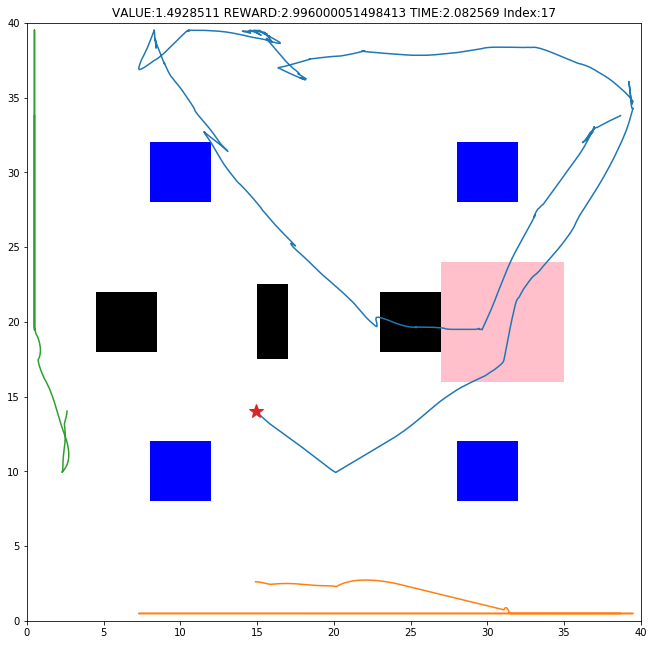

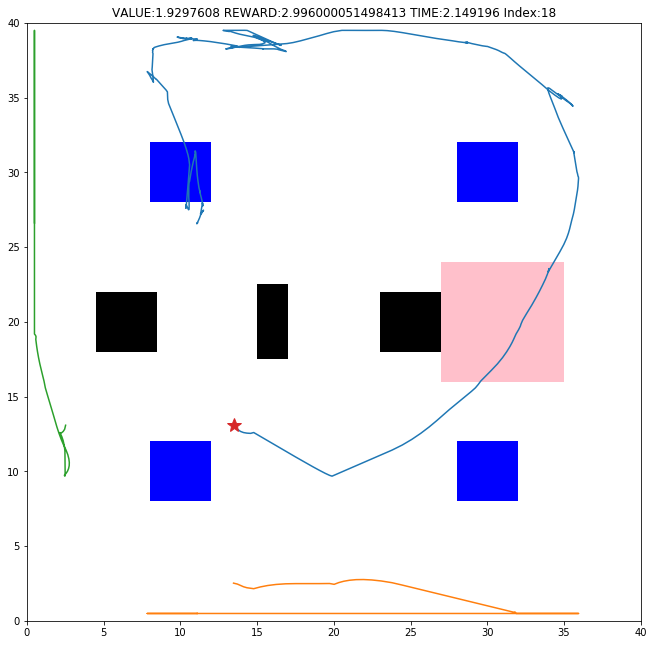

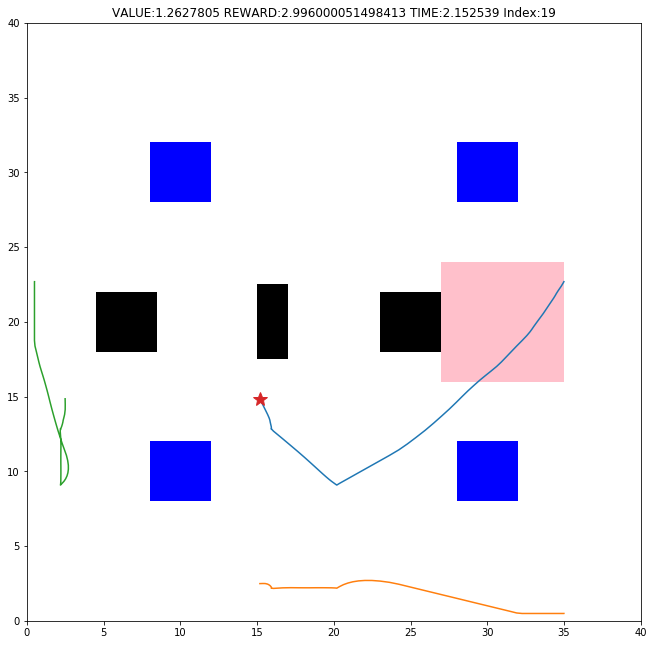

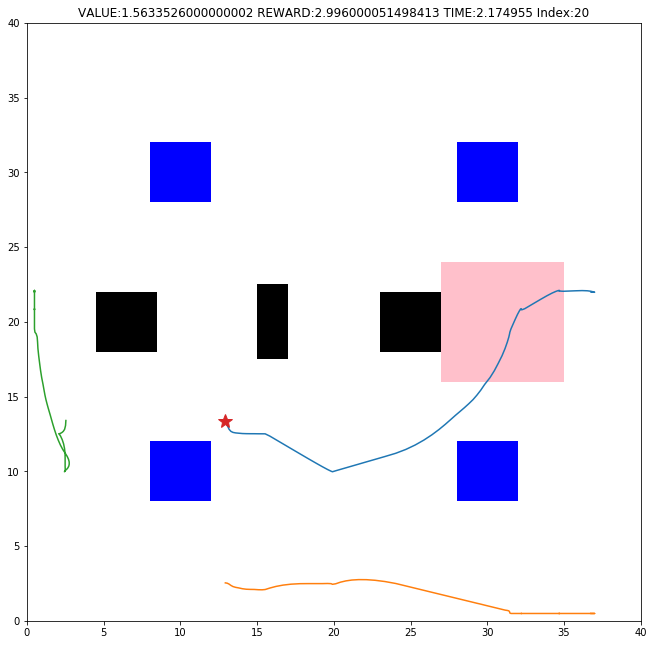

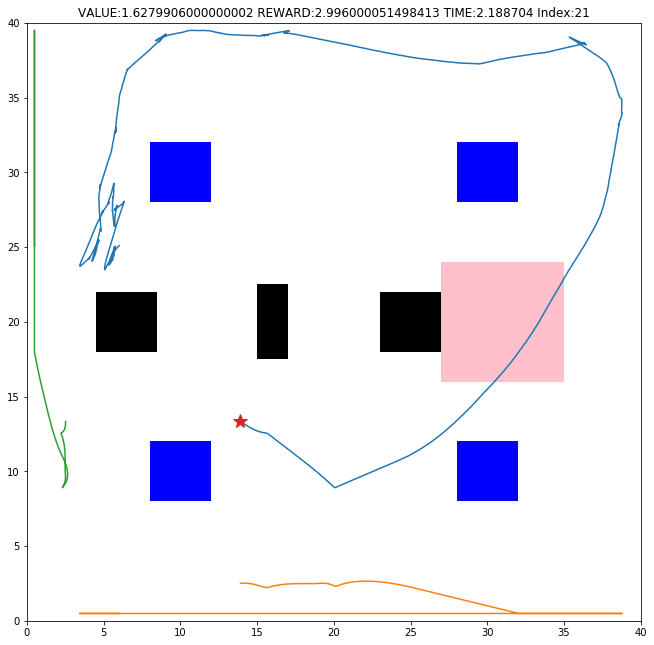

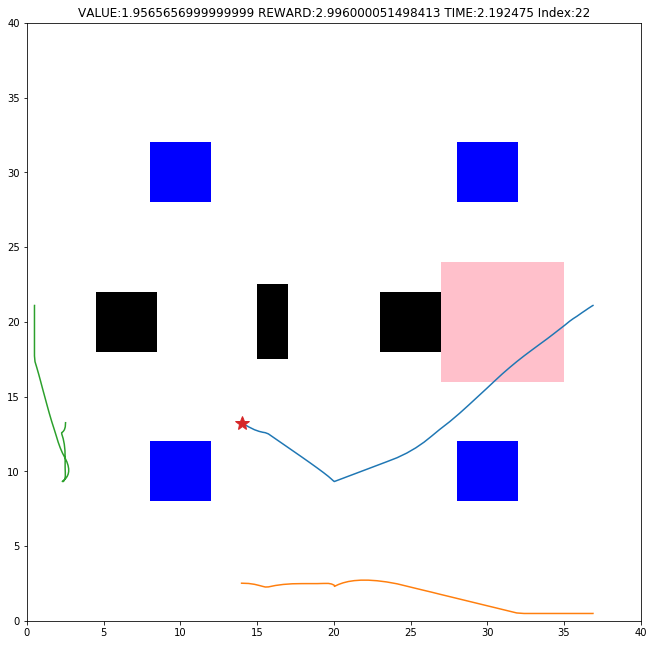

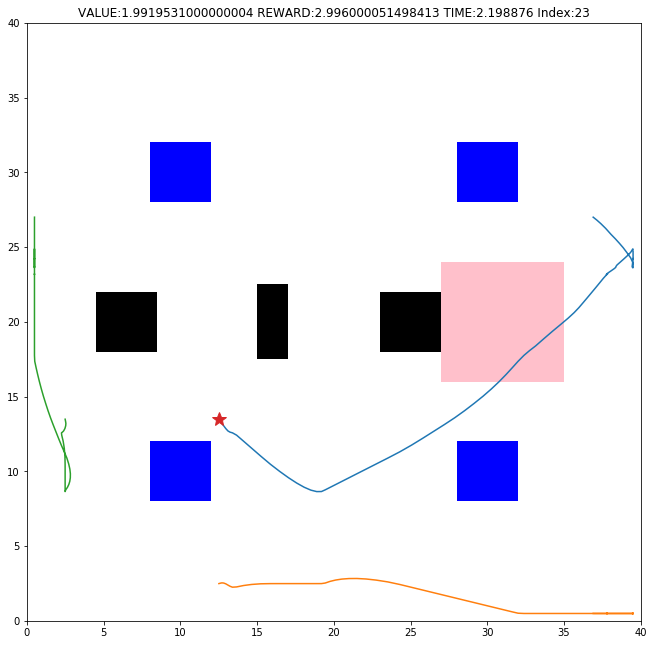

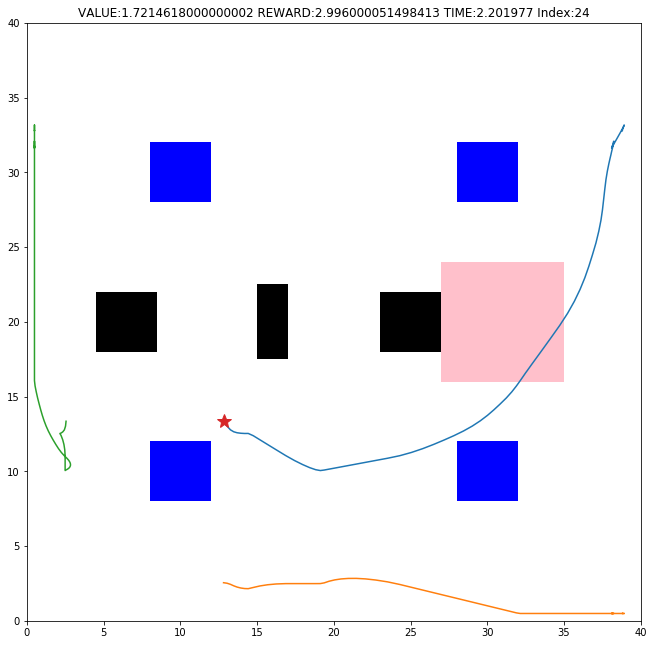

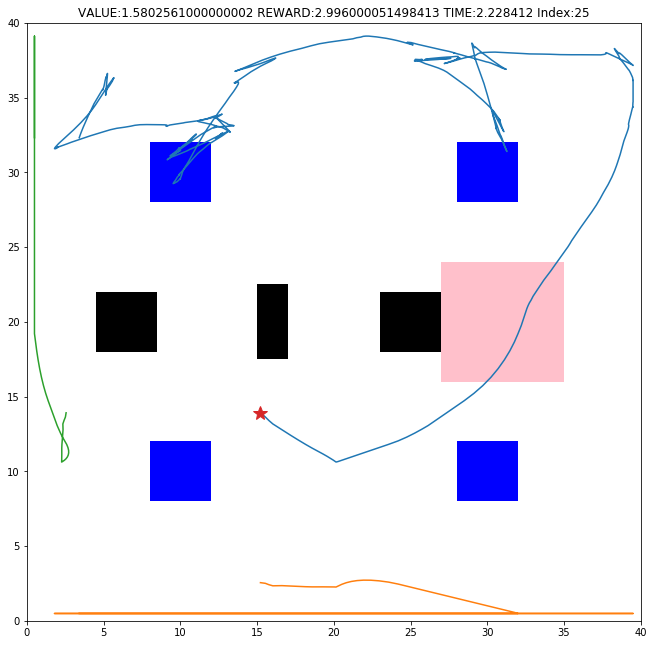

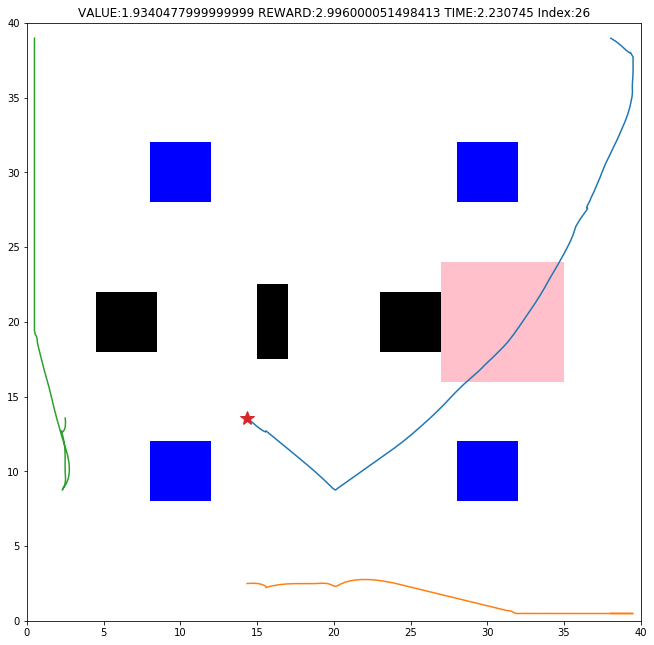

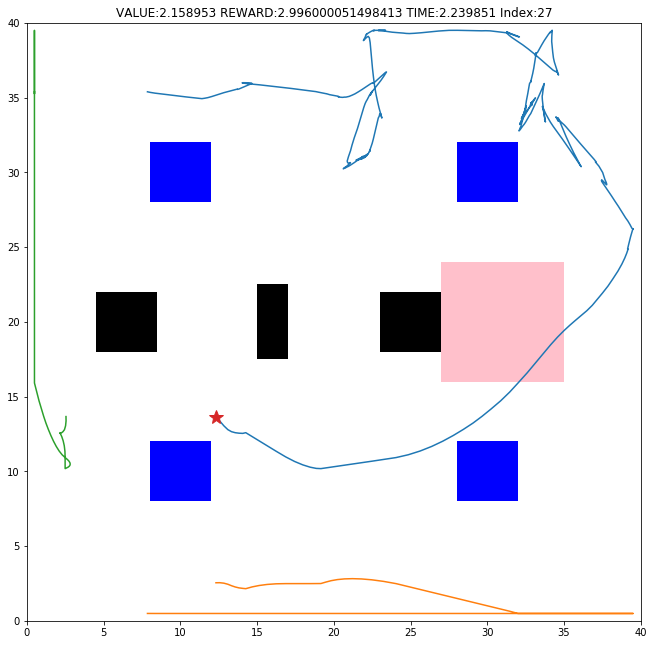

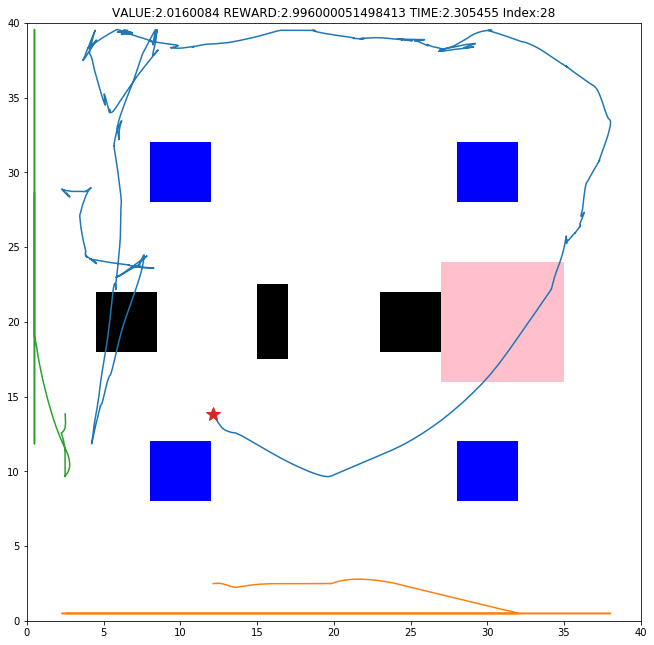

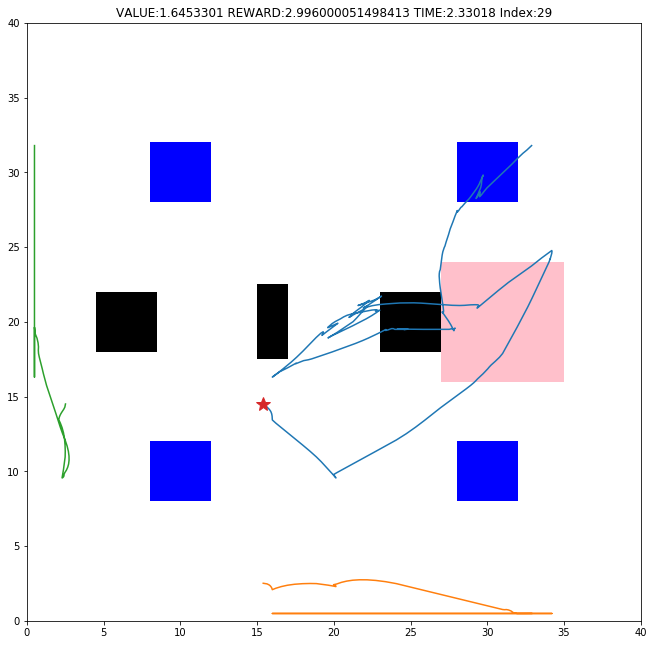

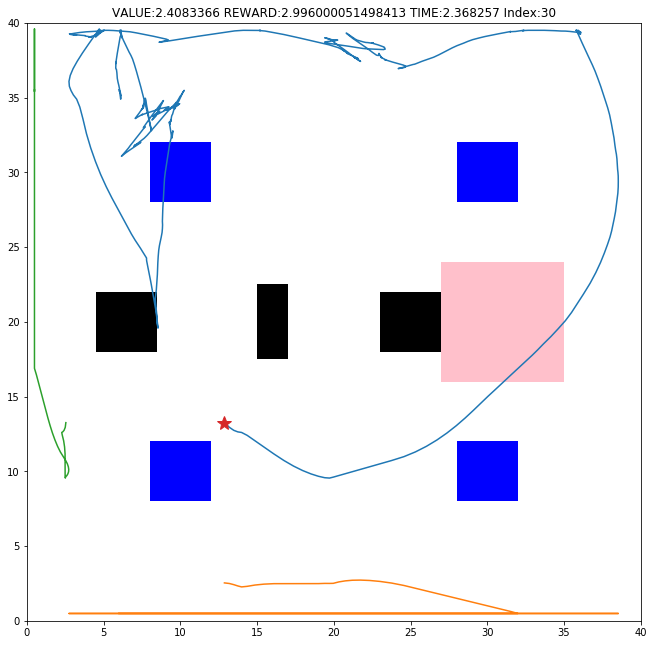

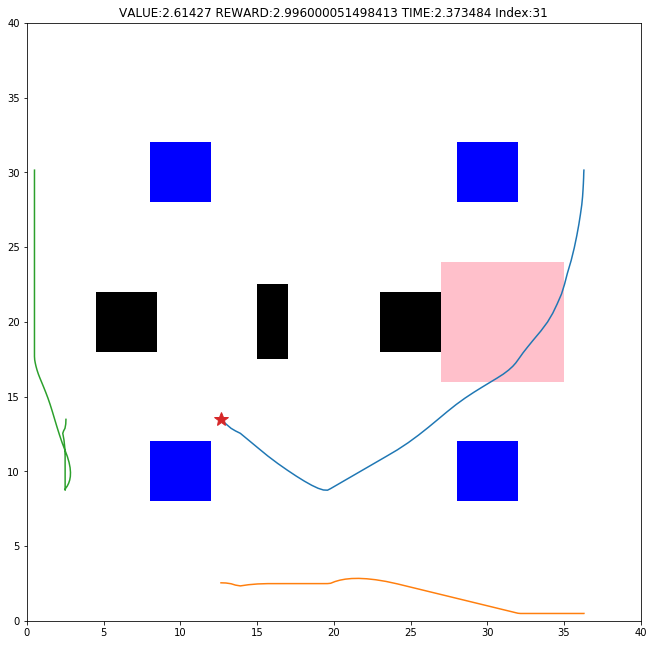

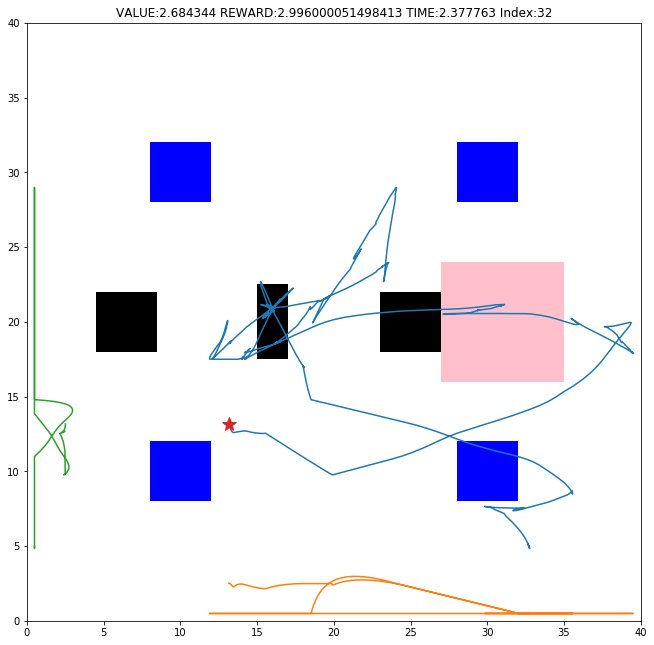

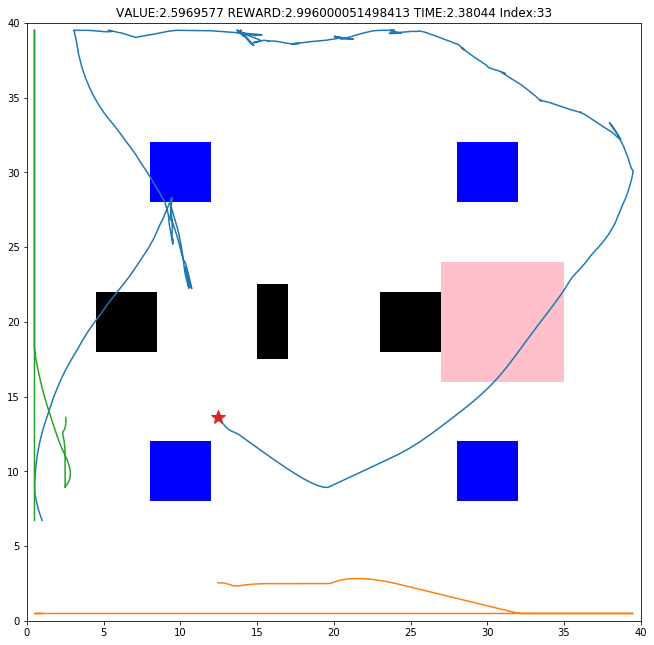

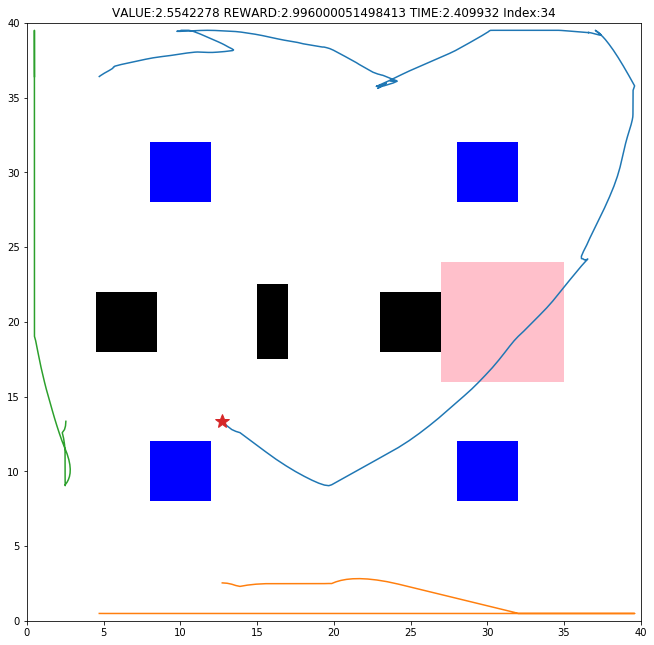

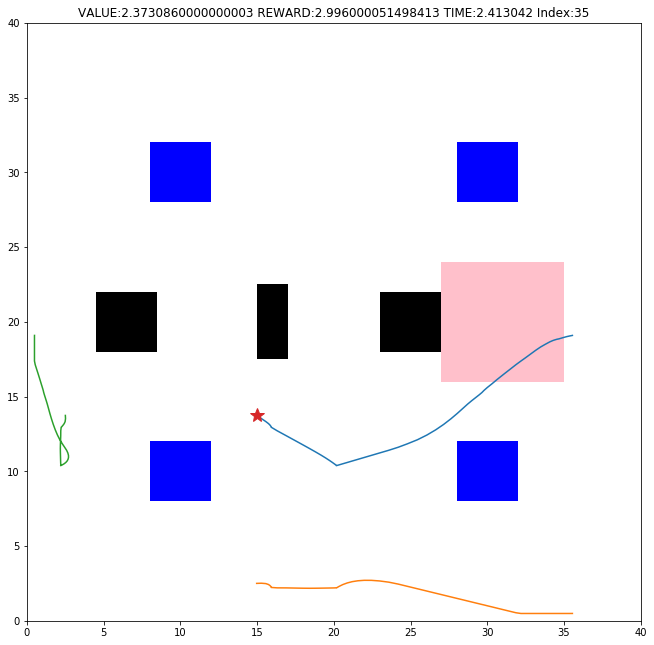

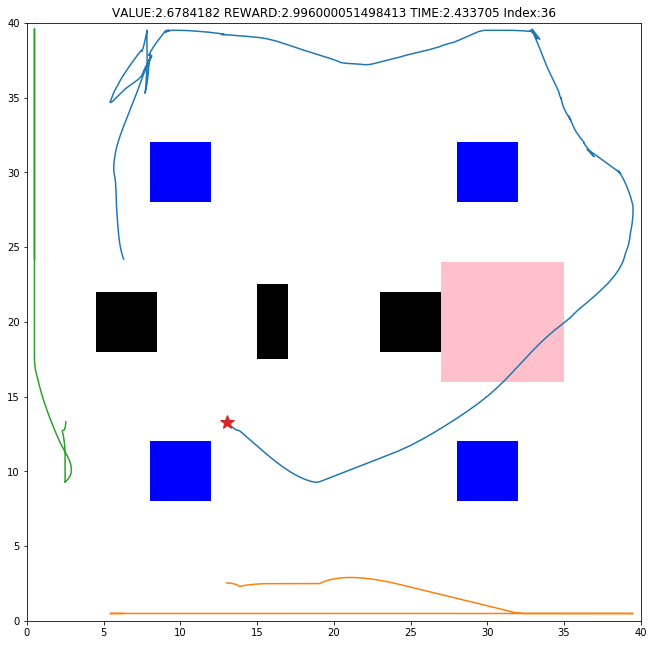

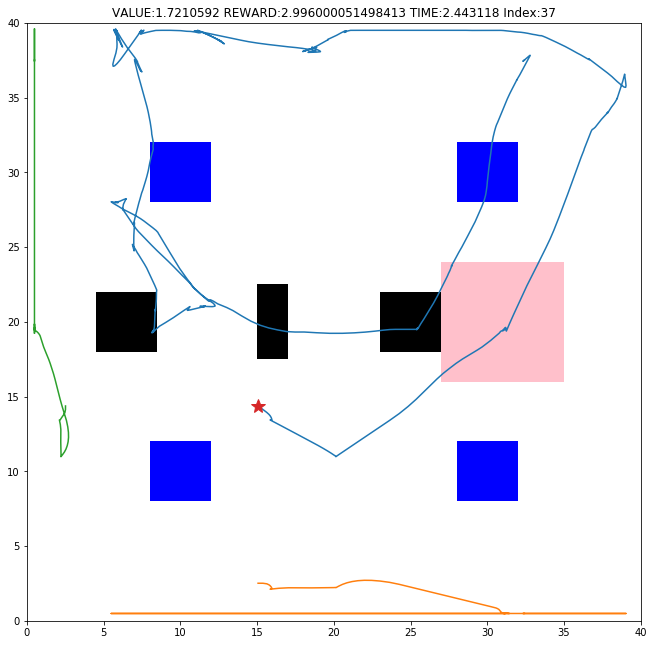

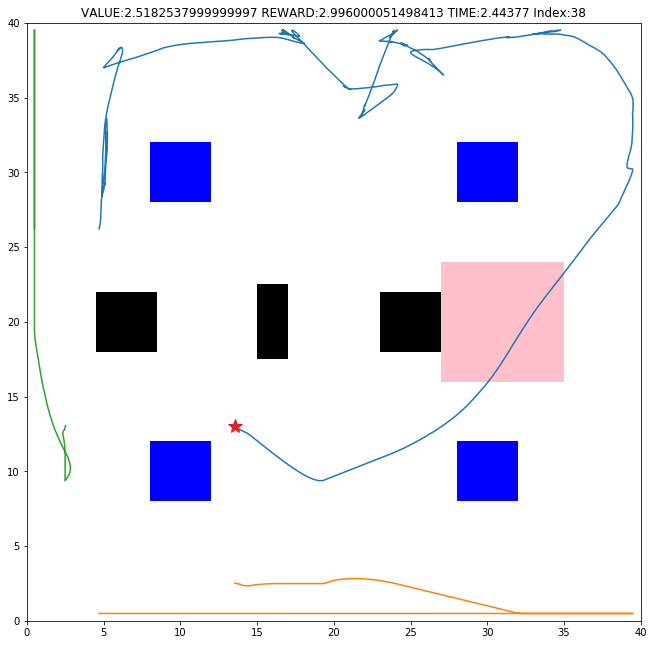

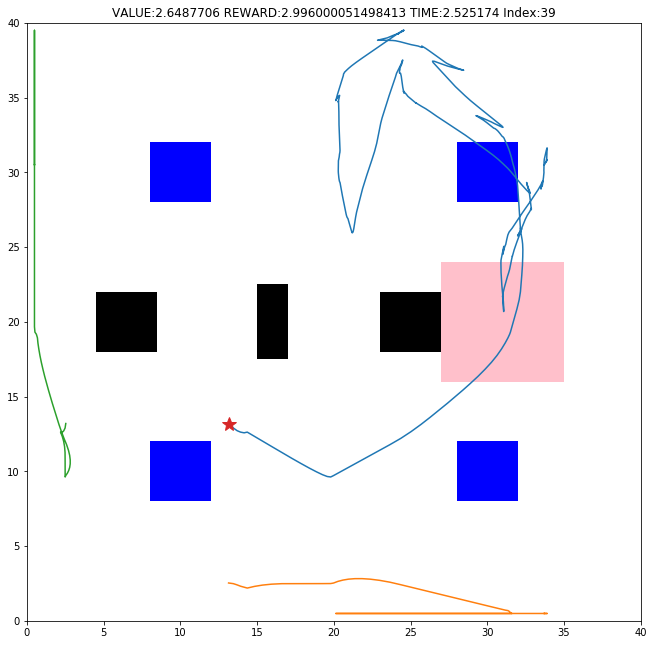

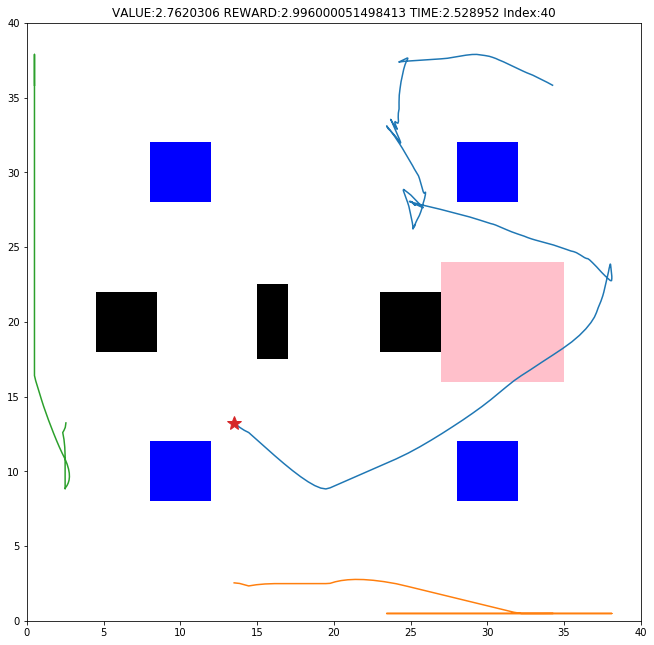

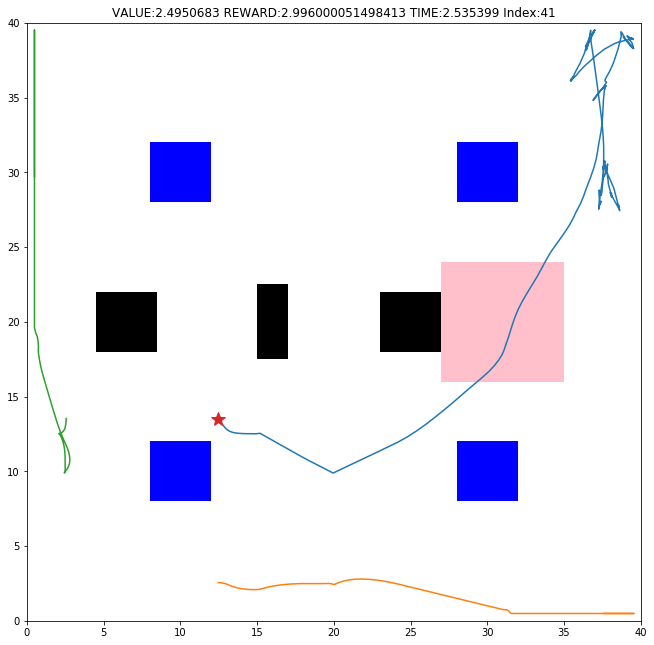

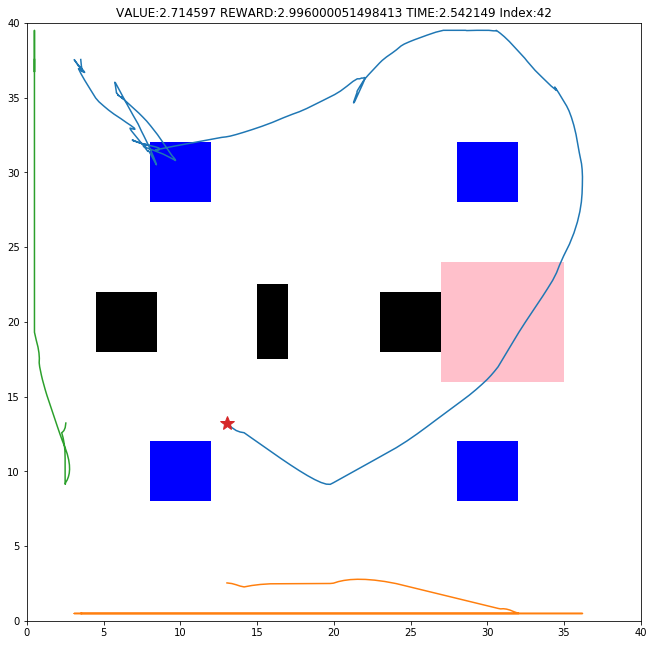

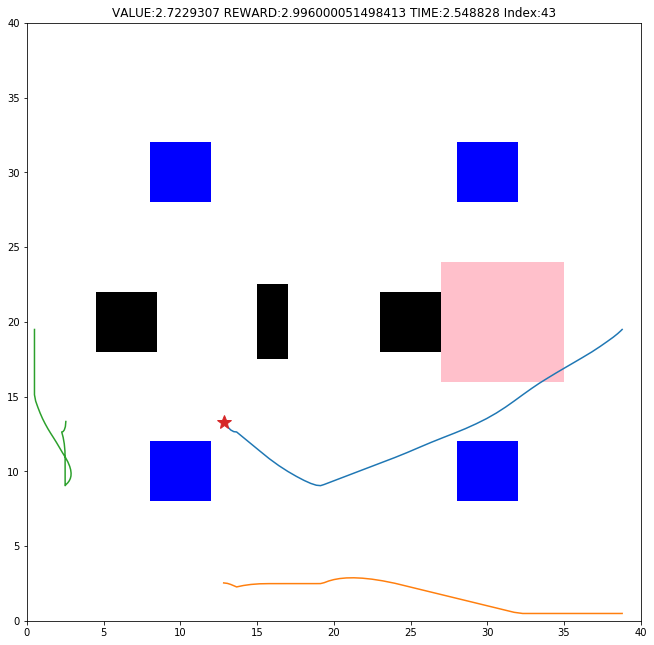

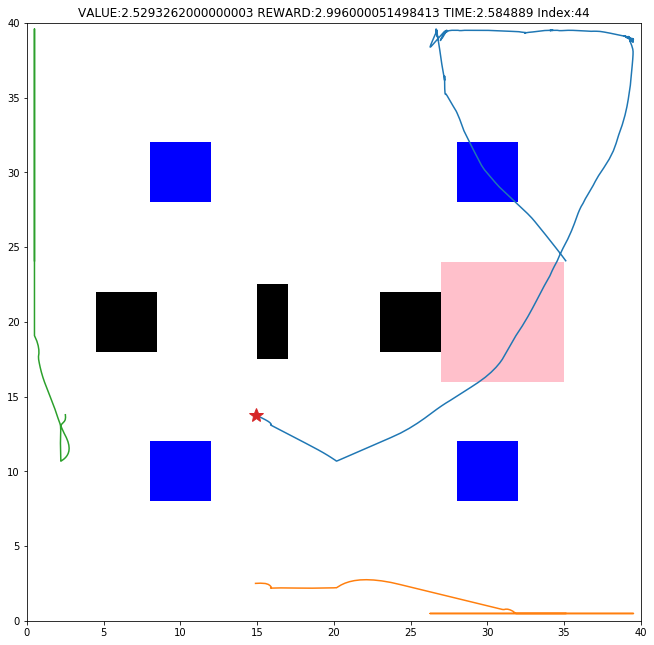

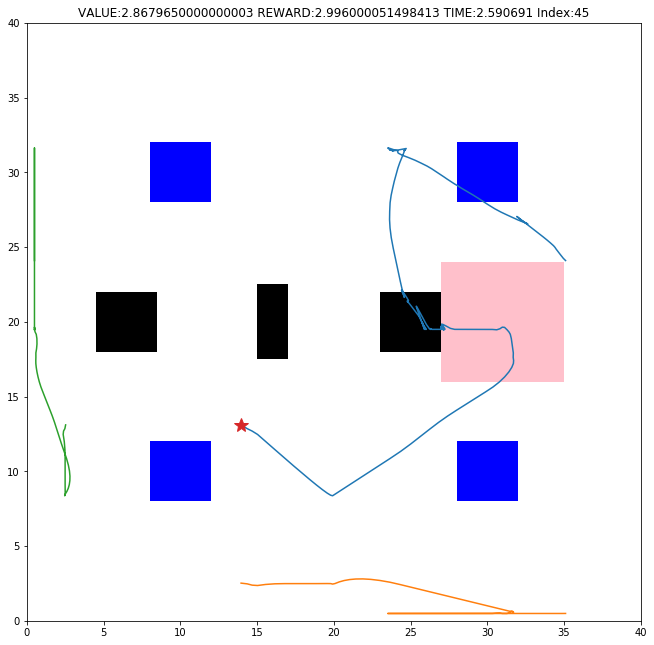

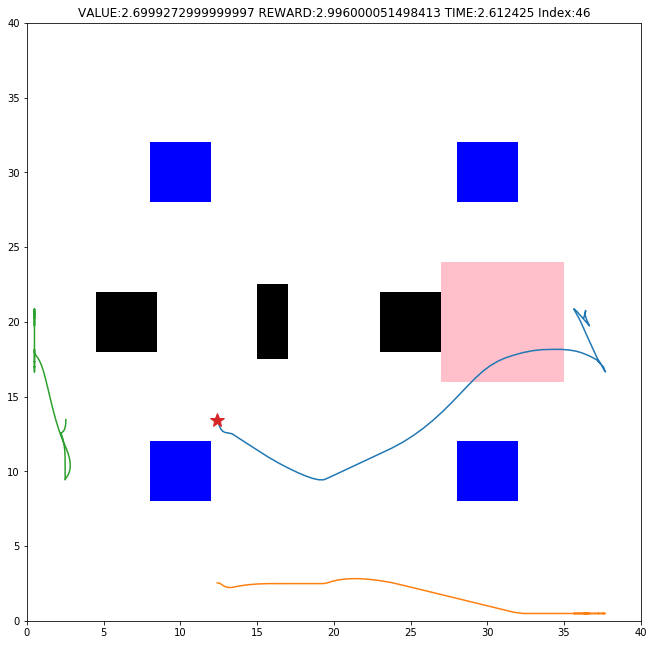

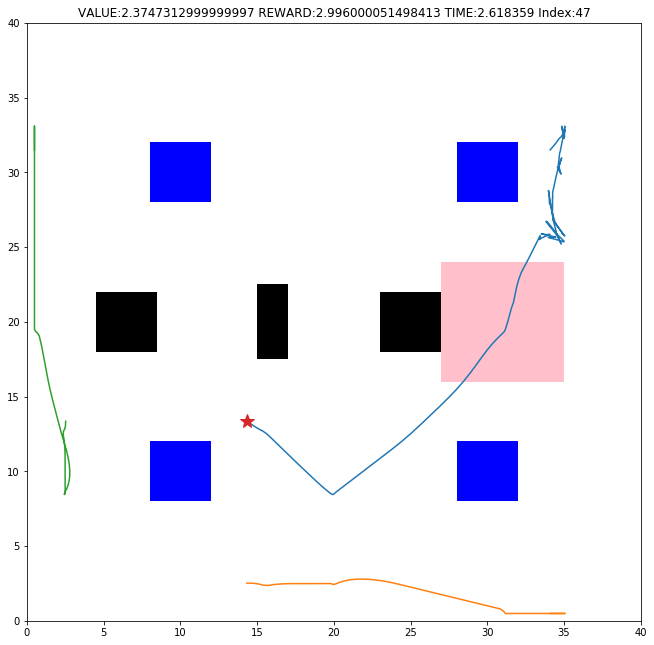

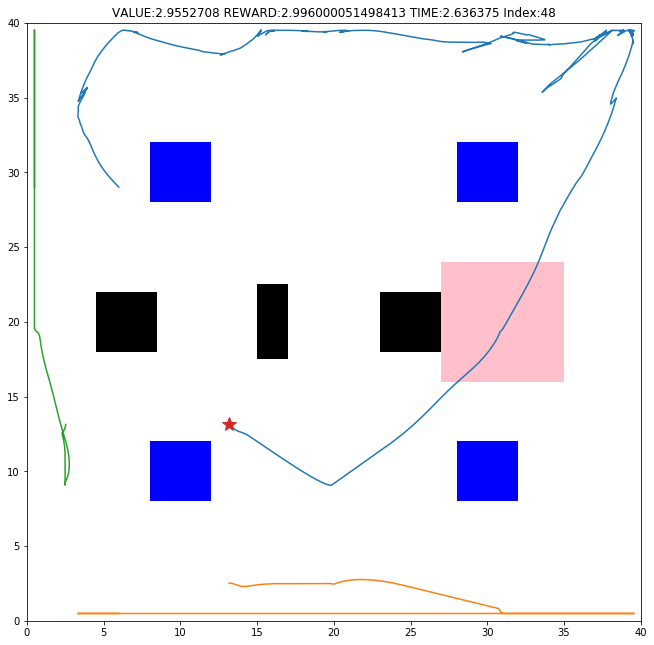

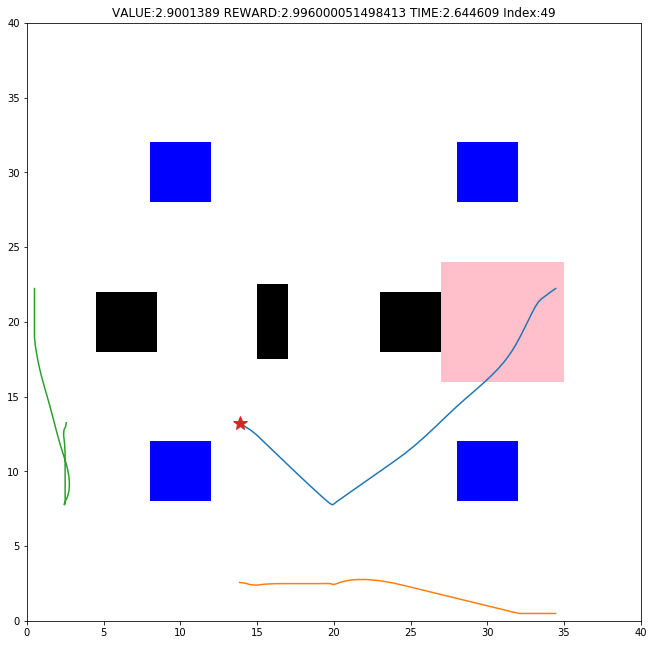

In [10]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pyplot as plt
import numpy as np
import argparse
import os
import pandas as pd



num_good_traj = 0
my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_204'
exps = glob(my_dir+'*')
fig = plt.figure(clear=True, figsize=(11,11))

d = exps[0]

df = load_results(d)
df2 = pd.DataFrame() 

df['f']= df['l'].cumsum()/1000000


df['perf']= df['ereward']/(df['max_reward'])
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold

df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])

time_limit = 4

df3 = df.where((df['f']<time_limit)&(df['max_value_error'] == 0)&(df['reward_woD'] != 0)).sort_values(by=['f'], ascending=True)
#df3 = df.where((df['max_value_error'] == 0)&(df['value'] != 0)).sort_values(by=['f'], ascending=False)

for ii in range(50):
    max_index = ii
    X = eval(df3['X'].iloc[max_index])[0:-1]
    Y = eval(df3['Y'].iloc[max_index])[0:-1]
    Z = eval(df3['Z'].iloc[max_index])[0:-1]
    fig = plt.figure(clear=True, figsize=(11,11))
    plt.plot(X, Z)
    plt.plot(X, Y)
    plt.plot(Y, Z)
    plt.plot(X[-1],Z[-1],"*",markersize=15)
    


    rectangle = plt.Rectangle((10 - 2,30- 2), 4, 4, fc='blue')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((30 -2,10- 2), 4, 4, fc='blue')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((30 -2,30- 2), 4, 4, fc='blue')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((10 -2,10- 2), 4, 4, fc='blue')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((31 -4,20- 4), 8, 8, fc='pink')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((6.5 -2,20- 2), 4, 4, fc='black')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((25 -2,20 -2), 4, 4, fc='black')
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((16 -1,20 -2.5), 2, 5, fc='black')
    plt.gca().add_patch(rectangle)

    plt.xlim(0,40)
    plt.ylim(0,40)
    plt.title('VALUE:{} REWARD:{} TIME:{} Index:{}'.format(df3['value'].iloc[max_index], df3['reward_woD'].iloc[max_index],df3['f'].iloc[max_index], ii))
    plt.show()